# Final Project Submission

* Student name: Shayan Abdul Karim Khan
* Student pace: Self Paced
* Scheduled project review date/time:
* Instructor name: Abhineet Kulkarni

## Problem Overview

Each year more than 42,000 people are needlessly killed on American streets and thousands more are injured. We call this suffering traffic “accidents” — but, in reality, we have the power to prevent traffic collisions. To counter these fatalities and injuries, the Department of Transportations (DOTs) across the US are working towards a new vision for safety called "Vision Zero". 

Vision Zero recognizes that people will sometimes make mistakes, so the road system and related policies should be designed to ensure those inevitable mistakes do not result in severe injuries or fatalities. This means that system designers and policymakers are expected to improve the roadway environment, policies (such as speed management), and other related systems to lessen the severity of crashes by working with stakeholders ranging from auto manufacturers to policy makers.

Similarly, the Chicago DOT wants to conduct a study to improve their methodolodies of mitigating crashes. There are usually a lot of crashes that result in causes never being identified and also serveral car crashes can form an underlying pattern. Chicago DOT waants to understand what multitude of factors can play some of the biggest roles in causing these crashes.

That is why this notebook is going to explore developing a model for predicting primmary contributary causes to car crashes and identifyng the top 10 factors that we find the biggest roles in these causes. 
We will  use the data available to predict the primary contributory cause of a car accident, given information about the car, the people in the car, the road conditions etc.

## Data Sources

The data being used is from the Chicago Polic Department (CPD) and is provided oninee by the City of Chicago. The data is from 2015 to the present day. It is updated daily but the data being used as a part of this project is recent until 3rd February 2023. 

There are 3 datasets being used for analysis:

1. Traffic crashes data summary: https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3ifhttps://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3ifv 
<br>

2. Vehicles information involved in a crash: https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3 
<br>

3. People information involved in a crash: https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d 

Considering that this is the official dataset of the City of Chicago regarding traffic crashes, it can be easilly concluded that it would be the most reliable dataset available. Using this dataset will also increase the confidence of the client on the results and recommendations of this project. 

## Data Understanding

This section will be exploratory to understand the different features of the data. All three datasets will be explored separately. Using the source documentation, data and the features will be interpreted and determinations will be made about which features are relevant to identifying the causes of car crashes. Towards the end of exploring the data, avenues of analysis that can be used will also become clearer. As data is explored, any anomalies or issues require further cleaning/processing will be identified and handled in the `Data Preparation` section.

To start things off, lets import all the libraries and functions that will be used in this notebook.

In [1497]:
import pandas as pd #imports the pandas library as pd to work on databases
from sodapy import Socrata # for API integration
import sqlite3 as sql # imports the sqlite3 library to leverage sql with pandas
from pandasql import sqldf # imports pandas sql library
from datetime import datetime # for datetime manipulation
import matplotlib.pyplot as plt # importing matplotlib for visualizations 

%matplotlib inline 
import numpy as np # imports the numpy library
import datetime as dt #import datetime module
import seaborn as sns #import seaborn
from collections import Counter #import Counter
import statsmodels.api as sm #import stats models
from statsmodels.stats.outliers_influence import variance_inflation_factor

#import scikit library functions
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit
from sklearn.feature_selection import RFECV


#import scipy libraries
from scipy import stats as stats

#import plotly
import plotly.express as px
import plotly.graph_objects as go

#import libraries to deal with unbaalanced dataset
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTENC

#import metrics
from sklearn import metrics
import itertools
from sklearn.metrics import plot_confusion_matrix

### Traffic Crashes - Crashes

This is the summary data for all the crashes. Thee dataset was downloaded and stores in the `data` folder as `Traffic_Crashes-Crashes`. The overview of the contents of this data is aavailable below and at https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if.

Crash data shows information about each traffic crash on city streets within the City of Chicago limits and under the jurisdiction of Chicago Police Department (CPD). Data are shown as is from the electronic crash reporting system (E-Crash) at CPD, excluding any personally identifiable information. Records are added to the data portal when a crash report is finalized or when amendments are made to an existing report in E-Crash. Data from E-Crash are available for some police districts in 2015, but citywide data are not available until September 2017. About half of all crash reports, mostly minor crashes, are self-reported at the police district by the driver(s) involved and the other half are recorded at the scene by the police officer responding to the crash. Many of the crash parameters, including street condition data, weather condition, and posted speed limits, are recorded by the reporting officer based on best available information at the time, but many of these may disagree with posted information or other assessments on road conditions. If any new or updated information on a crash is received, the reporting officer may amend the crash report at a later time. A traffic crash within the city limits for which CPD is not the responding police agency, typically crashes on interstate highways, freeway ramps, and on local roads along the City boundary, are excluded from this dataset.

As per Illinois statute, only crashes with a property damage value of $1,500 or more or involving bodily injury to any person(s) and that happen on a public roadway and that involve at least one moving vehicle, except bike dooring, are considered reportable crashes. However, CPD records every reported traffic crash event, regardless of the statute of limitations, and hence any formal Chicago crash dataset released by Illinois Department of Transportation may not include all the crashes listed here.

In [1498]:
#import the dataset using the API endpoint
crashes_df = pd.read_csv('data/Traffic_Crashes-Crashes.csv')

#preview thee first 5 rows
crashes_df.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,1.0,2.0,0.0,14,2,3,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,JB422857,NaN,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,...,0.0,0.0,2.0,0.0,8,4,9,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,JF318029,NaN,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,...,0.0,0.0,2.0,0.0,0,6,7,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,05b1982cdba5d8a00e7e76ad1ecdab0e598429f78481d2...,JF378711,NaN,08/29/2022 11:30:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,11,2,8,41.749348,-87.721097,POINT (-87.721096727406 41.749348170421)
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,JF324552,NaN,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,18,6,7,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)


In [1499]:
#Explore the info for all the features
crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692784 entries, 0 to 692783
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                692784 non-null  object 
 1   RD_NO                          688672 non-null  object 
 2   CRASH_DATE_EST_I               52531 non-null   object 
 3   CRASH_DATE                     692784 non-null  object 
 4   POSTED_SPEED_LIMIT             692784 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         692784 non-null  object 
 6   DEVICE_CONDITION               692784 non-null  object 
 7   WEATHER_CONDITION              692784 non-null  object 
 8   LIGHTING_CONDITION             692784 non-null  object 
 9   FIRST_CRASH_TYPE               692784 non-null  object 
 10  TRAFFICWAY_TYPE                692784 non-null  object 
 11  LANE_CNT                       198997 non-null  float64
 12  ALIGNMENT                     

There are a number of columns with missing values but they can also simply be categorical columns that don't apply to all records. The documentation on the columns available on https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if can be used to explore the columns separately. The descriptions have also been listed below.

1. `CRASH_RECORD_ID`: This number can be used to link to the same crash in the Vehicles and People datasets. This number also serves as a unique ID in this dataset. This will be important for joining the databases.
<br>

2. `RD_NO`: Chicago Police Department report number. For privacy reasons, this column is blank for recent crashes.
This column can be ignored since this does not give us any insight into the causes of crashes. **DROP COLUMN**
<br>

3. `CRASH_DATE_EST_I`: Crash date estimated by desk officer or reporting party (only used in cases where crash is reported at police station days after the crash). This column can be ignored since there are missing values here. There is another column for Crash Dates but has no missing values. **DROP COLUMN**
<br>

4. `CRASH_DATE`: Date and time of crash as entered by the reporting officer. This gives us insight into if there are periods where there are more crashes than others. If there is a discernable pattern, appropriate preventative measures can be taken. The time and date will have to be separated out for individual analysis. Also the initial description of thee dataset mentions that 2018 onwards citywide E-craash daat aiss available. Therefore, the data will be filtered out accordingly. Also, the daata has to be changed to datetime versions for proper use.
<br>

5. `POSTED_SPEED_LIMIT`: Posted speed limit, as determined by reporting officer. This is the speed limit for the area where the crash happened. This coupled with the speed that the car was travelling at can help inform if the crash was at high speeds. Consequently, this can be a critical contirbutor in determining the cause of the crash.
<br>

6. `TRAFFIC_CONTROL_DEVICE`: Traffic control device present at crash location, as determined by reporting officer. It would be important to understand the contents of this column before making a decision on its use. 

In [1500]:
# checking null values
crashes_df.isna().sum()

CRASH_RECORD_ID                       0
RD_NO                              4112
CRASH_DATE_EST_I                 640253
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         493787
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       19010
CRASH_TYPE                            0
INTERSECTION_RELATED_I           533987
NOT_RIGHT_OF_WAY_I               660299
HIT_AND_RUN_I                    477815
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0


In [1501]:
#check unique values
crashes_df['TRAFFIC_CONTROL_DEVICE'].value_counts()

NO CONTROLS                 397249
TRAFFIC SIGNAL              192000
STOP SIGN/FLASHER            68792
UNKNOWN                      24545
OTHER                         4515
LANE USE MARKING              1226
YIELD                          977
OTHER REG. SIGN                721
OTHER WARNING SIGN             591
RAILROAD CROSSING GATE         448
PEDESTRIAN CROSSING SIGN       384
DELINEATORS                    271
SCHOOL ZONE                    263
FLASHING CONTROL SIGNAL        248
POLICE/FLAGMAN                 243
OTHER RAILROAD CROSSING        159
RR CROSSING SIGN                93
NO PASSING                      40
BICYCLE CROSSING SIGN           19
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64

There are multiple categories but the `NO CONTROLS` category stands out with almost 50% share in the data for this column. The other categorieswould be location dependent signage. This data can be used to determine whether `NO CCONTROLS` plays a significantlt higher part in certain types of crashes. The data in this column can be grouped together to only two categories, `NO CONTROLS` and `CONTROLS`.

7. `DEVICE_CONDITION`: Condition of traffic control device, as determined by reporting officer. This would be an important aspect to consider. Lets explore the contents of this column.

In [1502]:
#check unique values
crashes_df['DEVICE_CONDITION'].value_counts()

NO CONTROLS                 401903
FUNCTIONING PROPERLY        238515
UNKNOWN                      41164
OTHER                         5347
FUNCTIONING IMPROPERLY        3373
NOT FUNCTIONING               2143
WORN REFLECTIVE MATERIAL       258
MISSING                         81
Name: DEVICE_CONDITION, dtype: int64

Considering that this column also has a demarcated category of `NO CONTROLS` with categories highlighting whther there were any issues with the traffic control devices present, it would be more useful to use this column rather than using the `TRAFFIC_CONTROL_DEVICE` column. It is also clear that having no controls is the biggest contributor to traffic crashes but what kind of impact they have is something that has to be explored.

Therefore, **DROP `TRAFFIC_CONTROL_DEVICE` COLUMN**

`WEATHER_CONDITION`: Weather condition at time of crash, as determined by reporting officer. This will definitely be a big factor in predicting the cause of crashes as well since the weather can play a big part in traffic accidents. Lets take a look at the contents of the column.

In [1503]:
#check unique values
crashes_df['WEATHER_CONDITION'].value_counts()

CLEAR                       546474
RAIN                         59674
UNKNOWN                      34543
SNOW                         25734
CLOUDY/OVERCAST              20505
OTHER                         2204
FREEZING RAIN/DRIZZLE         1229
FOG/SMOKE/HAZE                1031
SLEET/HAIL                     881
BLOWING SNOW                   367
SEVERE CROSS WIND GATE         138
BLOWING SAND, SOIL, DIRT         4
Name: WEATHER_CONDITION, dtype: int64

The unkown data has to be dealt with in the **Data Preparation** section but all other data will be valuable to carry forward. It seems like the most car crashes take place in the clear weather while the worse the weather is the fewer car crashes there are. This might be becausee people naturally are more carefull during bad weather. Nonetheless this has to be inveestigated more to see whether inclement weather accidents are more serious or impact specific types of vehicles. It can also be that there are less vehicles on the road during inclement weather therefore while the numbers might be low, the ratio of cars on the road and number of accidents might be high.

`LIGHTING_CONDITION`: Light condition at time of crash, as determined by reporting office. This is also another big factor. Theoretically, bad lighting conditions can play a big part in car crashes. This column can prove to be critial. Lets invvestigate it to understand the contents.

In [1504]:
#check unique values
crashes_df['LIGHTING_CONDITION'].value_counts()

DAYLIGHT                  445517
DARKNESS, LIGHTED ROAD    153269
DARKNESS                   33364
UNKNOWN                    28678
DUSK                       20317
DAWN                       11639
Name: LIGHTING_CONDITION, dtype: int64

In [1505]:
crashes_df['LIGHTING_CONDITION'].value_counts(normalize=True)

DAYLIGHT                  0.643082
DARKNESS, LIGHTED ROAD    0.221236
DARKNESS                  0.048159
UNKNOWN                   0.041395
DUSK                      0.029327
DAWN                      0.016800
Name: LIGHTING_CONDITION, dtype: float64

Similar to the weather conditions data, it looks like the best lighting condition has the most accidents. This can be either be because peoplee are generally more careful when there's less light or that there are fewer cars on the road therefore fewer accidents. Nonetheless, lighting is an important factor when it comes to visibility. It would be beneficial to keeep this data and let thee model decide whether it provides useful information or not.

`ROAD_DEFECT`: Road defects, as determined by reporting officer. This might be important. Lets take a look at the data first.

In [1506]:
#check unique values
crashes_df['ROAD_DEFECT'].value_counts()

NO DEFECTS           565943
UNKNOWN              112665
RUT, HOLES             5561
OTHER                  3858
WORN SURFACE           2859
SHOULDER DEFECT        1350
DEBRIS ON ROADWAY       548
Name: ROAD_DEFECT, dtype: int64

In [1507]:
#check the ratios
crashes_df['ROAD_DEFECT'].value_counts(normalize=True)

NO DEFECTS           0.816911
UNKNOWN              0.162626
RUT, HOLES           0.008027
OTHER                0.005569
WORN SURFACE         0.004127
SHOULDER DEFECT      0.001949
DEBRIS ON ROADWAY    0.000791
Name: ROAD_DEFECT, dtype: float64

It is important to note that No defects has thee largest number of crashes. This might be a sign that smooth and good quality roads lead people to be less careful of the road conditions. Although the data is skewed, it might be helpful to see how big of a part it plays in the crashes from a higher level.

`REPORT_TYPE`: Administrative report type (at scene, at desk, amended). This column can be ignored for the purposes of this analysis.

**DROP REPORT_TYPE COLUMN**

`CRASH_TYPE`: A general severity classification for the crash. Can be either Injury and/or Tow Due to Crash or No Injury / Drive Away. This data will be used to filter on crashes that had injuries or fatalities. While the eventual goal is to have no crashes, the goal of this analysis is to support work towards Vision Zero which focuses on fatalities and injuries. Lets investigate the contents if this column before movving on.

In [1508]:
#check unique values
crashes_df['CRASH_TYPE'].value_counts()

NO INJURY / DRIVE AWAY              510406
INJURY AND / OR TOW DUE TO CRASH    182378
Name: CRASH_TYPE, dtype: int64

With only 180,000 records, out data size will be significantly reduced but helps us focus on the main problem.

`INTERSECTION_RELATED_I`: A field observation by the police officer whether an intersection played a role in the crash. Does not represent whether or not the crash occurred within the intersection. 
Lets investigate the contents of this column.

In [1509]:
#check unique values
crashes_df['INTERSECTION_RELATED_I'].value_counts()

Y    151396
N      7401
Name: INTERSECTION_RELATED_I, dtype: int64

Usually at intersections, there is a large amount of non-straight traffic movements, cars slowing down, pedestrain movement and generally a heightened probability of crashes. This is one of the reeasons that DOT creates signalized intersectinos. This would be important to carry forwaard to understand whether this general understanding of intersections plays a big part in crashes or not. If it does, DOT could be able to hone in on intersection types that play a significant role and develop traffic engineering plans accordingly.

`NOT_RIGHT_OF_WAY_I`: Whether the crash begun or first contact was made outside of the public right-of-way. This column also has almost 50% of its values missing. Also, this gives us insight into the circumstances around a crash but not significant insight into the cause of a crash. 

**DROP NOT_RIGHT_OF_WAY_I COLUMN**

`HIT_AND_RUN_I`: Crash did/did not involve a driver who caused the crash and fled the scene without exchanging information and/or rendering aid. This gives us inight into the aftermaths of the crash but no significant insight into the cause of it.

**DROP HIT_AND_RUN_I COLUMN**

`DAMAGE`: A field observation of estimated damage. Similar to the previous two, this doesn't provide insight into the causes of the crash. 

**DROP DAMAGE COLUMN**

`DATE_POLICE_NOTIFIED`: Calendar date on which police were notified of the crash. Similarly, this doesn't provide any insight into the causes of the crash.

**DROP DATE_POLICE_NOTIFIED COLUMN**

`PRIM_CONTRIBUTORY_CAUSE`: The factor which was most significant in causing the crash, as determined by officer judgment. This will be the target column that will be used. Lets investigate the contents of this column.

In [1510]:
#check unique values
crashes_df['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                                                                 266260
FAILING TO YIELD RIGHT-OF-WAY                                                        75716
FOLLOWING TOO CLOSELY                                                                69035
NOT APPLICABLE                                                                       36421
IMPROPER OVERTAKING/PASSING                                                          33504
FAILING TO REDUCE SPEED TO AVOID CRASH                                               29613
IMPROPER BACKING                                                                     28228
IMPROPER LANE USAGE                                                                  25526
IMPROPER TURNING/NO SIGNAL                                                           22879
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  22419
DISREGARDING TRAFFIC SIGNALS                                                         13383

While there are a lot of categories, there seem to be several overlapping ones which we can group later on during the Data Preparation phase.

`SEC_CONTRIBUTORY_CAUSE`: The factor which was second most significant in causing the crash, as determined by officer judgment. Similar to the previous one, this will be an important column in analysis.

In [1511]:
#check unique values
crashes_df['SEC_CONTRIBUTORY_CAUSE'].value_counts()

NOT APPLICABLE                                                                      282372
UNABLE TO DETERMINE                                                                 251338
FAILING TO REDUCE SPEED TO AVOID CRASH                                               26909
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  21221
FAILING TO YIELD RIGHT-OF-WAY                                                        21098
FOLLOWING TOO CLOSELY                                                                18283
IMPROPER OVERTAKING/PASSING                                                          10318
IMPROPER LANE USAGE                                                                   9863
WEATHER                                                                               8260
IMPROPER TURNING/NO SIGNAL                                                            6921
IMPROPER BACKING                                                                      5666

While there are a lot of categories, there seem to be several overlapping ones which we can group later on during the Data Preparation phase.

`STREET_NO`: Street address number of crash location, as determined by reporting officer. While this is a valuable data point, there are latitude and longtitude data points which can proove to be more useful.

**DROP STREET_NO COLUMN**

Similarly, `STREET_DIRECTION`, `STREET_NAME`, and `BEAT_OF_OCCURRENCE` can be **DROPPED**.

Also `PHOTOS_TAKEN_I` and `STATEMENTS_TAKEN_I` are relevant to the police investigation records but not for the purposes of this notebook's analysis. Therefore they can be **DROPPED**

`WORK_ZONE_I`, `WORK_ZONE_TYPE`, and `WORKERS_PRESENT_I` are important columns to caarry forward. Usually these aree critical areas where speed limits are significantly reduced and there is a lot of worker traffic during shift hours. These can be very sensitive areas that can be significant towards attaining Vision Zero therefore it will be interesting to see their contribution towards crashes. 

Nonetheless we can drop the `WORK_ZONE_TYPE` column since the granularity of the analysis isn't specifically based on work zone type crashes. If aa significant correlation is found, then this area can be further investigated in future analysis.

`NUM_UNITS` will be an important data point since it gives information on the number of units involved in the crash.

Similarly, aligning with the Vision Zero goal, `INJURIES_TOTAL` and `INJURIES_FATAL` would be valuable columns to use in analysis. 

The other Injuries columns can be **DROPPED**.

`CRASH_HOUR`, `CRASH_DAY_OF_WEEK`, and `CRASH_MONTH` can be used instead of the timesatamp in column `CRASH_DATE` since these are broken down values. Nonetheless, what would be valuable from the timestamp column is the year of the crash. It might be possible that the year can play a big part in recognizing patterns of the accidents.

`LATITUDE` and `LONGITUDE` will be used for location data for crashes. This will helo determine if there are specific areas that more volatile to crashes as compared to others.

**SUMMARY**

The following columns will be carried forward:

1. CRASH_RECORD_ID
2. CRASH_DATE
3. POSTED_SPEED_LIMIT
4. DEVICE_CONDITION
5. WEATHER_CONDITION
6. CRASH_TYPE
7. PRIM_CONTRIBUTORY_CAUSE
8. SEC_CONTRIBUTORY_CAUSE
9. WORK_ZONE_I
10. WORKERS_PRESENT_I
11. INJURIES_TOTAL
12. INJURIES_FATAL
13. CRASH_HOUR
14. CRASH_DAY_OF_WEEK
15. CRASH_MONTH
16. LATITUDE
17. LONGITUDE
18. LIGHTING_CONDITION
19. NUM_UNITS


### Traffic Crashes - Vechiles

This is the summary data for all the crashes. Thee dataset was downloaded and stores in the `data` folder as `Traffic_Crashes-Vehicles`. The overview of the contents of this data is aavailable below and at https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3.

This dataset contains information about vehicles (or units as they are identified in crash reports) involved in a traffic crash. This dataset should be used in conjunction with the traffic Crash and People dataset available in the portal. “Vehicle” information includes motor vehicle and non-motor vehicle modes of transportation, such as bicycles and pedestrians. Each mode of transportation involved in a crash is a “unit” and get one entry here. Each vehicle, each pedestrian, each motorcyclist, and each bicyclist is considered an independent unit that can have a trajectory separate from the other units. However, people inside a vehicle including the driver do not have a trajectory separate from the vehicle in which they are travelling and hence only the vehicle they are travelling in get any entry here. This type of identification of “units” is needed to determine how each movement affected the crash. Data for occupants who do not make up an independent unit, typically drivers and passengers, are available in the People table. Many of the fields are coded to denote the type and location of damage on the vehicle. Vehicle information can be linked back to Crash data using the “CRASH_RECORD_ID” field. Since this dataset is a combination of vehicles, pedestrians, and pedal cyclists not all columns are applicable to each record.

In [1512]:
#import the dataset using the API endpoint
vehicles_df = pd.read_csv('data/Traffic_Crashes-Vehicles.csv')

#preview thee first 5 rows
vehicles_df.head()

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_4590/3771688054.py:2: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,53,55,58,59,61,71) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicles_df = pd.read_csv('data/Traffic_Crashes-Vehicles.csv')


,CRASH_UNIT_ID,CRASH_RECORD_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,749949,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,2,PARKED,NaN,834819.0,NaN,TOYOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,749950,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,3,PARKED,NaN,834817.0,NaN,GENERAL MOTORS CORPORATION (GMC),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,871921,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,04/13/2020 10:50:00 PM,2,DRIVER,NaN,827212.0,NaN,BUICK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1513]:
#Explore the info for all the features
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416095 entries, 0 to 1416094
Data columns (total 72 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CRASH_UNIT_ID             1416095 non-null  int64  
 1   CRASH_RECORD_ID           1416095 non-null  object 
 2   RD_NO                     1408273 non-null  object 
 3   CRASH_DATE                1416095 non-null  object 
 4   UNIT_NO                   1416095 non-null  int64  
 5   UNIT_TYPE                 1414134 non-null  object 
 6   NUM_PASSENGERS            209579 non-null   float64
 7   VEHICLE_ID                1384025 non-null  float64
 8   CMRC_VEH_I                26451 non-null    object 
 9   MAKE                      1384020 non-null  object 
 10  MODEL                     1383876 non-null  object 
 11  LIC_PLATE_STATE           1258222 non-null  object 
 12  VEHICLE_YEAR              1159243 non-null  float64
 13  VEHICLE_DEFECT            1

`CRASH_UNIT_ID`, `RD_NO`, `UNIT_NO`, `VEHICLE_ID`, and `CMRC_VEH_I`,  are unique IDs for crash reports which can be ignored for the purposes of the analysis. These columns will be **DROPPED**

`MAKE`, `MODEL`, `LIC_PLATE_STATE`, `VEHICLE_YEAR`, and `TRAVEL_DIRECTION` are speciific informations relevant to the vehicle. These are valuable information to keep track but these don;t provide valuable insights into causes for crashes. While the argument can be made that the make or vehicle year of a car can showcase which brands of cars and which years are involved in the most crashes, these singular data points can inform biased policies. For instance, older cars are usually owned by people who can't afford the expensive new models. Moreover, the more important aspect to know would be what kind of safety features did these cars have to understand how helpful ccertain safety features have but that data is not availabl. Therefore, these columns will be **DROPPED**.

`VEHICLE_DEFECT`: This column might contain some intersting data. Lets investigate the contents of this column.

In [1514]:
#check unique values
vehicles_df['VEHICLE_DEFECT'].value_counts()

NONE                768370
UNKNOWN             601707
OTHER                 6782
BRAKES                4566
TIRES                  700
STEERING               650
WHEELS                 365
SUSPENSION             241
ENGINE/MOTOR           183
FUEL SYSTEM            150
LIGHTS                  86
WINDOWS                 82
CARGO                   47
SIGNALS                 38
RESTRAINT SYSTEM        21
TRAILER COUPLING        19
EXHAUST                 18
Name: VEHICLE_DEFECT, dtype: int64

while thiss information is useful, 98% of the data is skewed towards None, Unkown or Other values that don't provide us any valuable insights. We can use oversampling methodlogies to help balance out the data to provide valuable insights.

`VEHICLE_TYPE`: The type of vehicle, if relevant. Lets investigate the contents of this column.

In [1515]:
#check unique values
vehicles_df['VEHICLE_TYPE'].value_counts()

PASSENGER                                 870964
SPORT UTILITY VEHICLE (SUV)               186498
UNKNOWN/NA                                131562
VAN/MINI-VAN                               67371
PICKUP                                     43239
TRUCK - SINGLE UNIT                        26270
OTHER                                      16301
BUS OVER 15 PASS.                          14529
TRACTOR W/ SEMI-TRAILER                    13251
BUS UP TO 15 PASS.                          3487
MOTORCYCLE (OVER 150CC)                     3217
SINGLE UNIT TRUCK WITH TRAILER              2131
OTHER VEHICLE WITH TRAILER                  1774
TRACTOR W/O SEMI-TRAILER                    1766
AUTOCYCLE                                    648
MOPED OR MOTORIZED BICYCLE                   382
MOTOR DRIVEN CYCLE                           326
ALL-TERRAIN VEHICLE (ATV)                    160
FARM EQUIPMENT                                72
3-WHEELED MOTORCYCLE (2 REAR WHEELS)          49
RECREATIONAL OFF-HIG

This data will be very valuable to discern how different types of vehicles get into accidents and understand the trends in causes. The imbalance in the data has to be aaddresssed later in th eDaata Preparations Section.

`VEHICLE_USE`: The normal use of the vehicle, if relevant. In conjunction with previous column, this column can be used to createe grouped categories of vehicles such as Personal, Rideshare, etc. We can also see that there are more unknown records in this collumn than the previous one. We can use the previous column to reduce the number of unkowns n our data. 

In [1516]:
#check unique values
vehicles_df['VEHICLE_USE'].value_counts()

PERSONAL                        894350
UNKNOWN/NA                      279642
NOT IN USE                       71810
OTHER                            43301
TAXI/FOR HIRE                    18505
COMMERCIAL - SINGLE UNIT         17164
RIDESHARE SERVICE                11623
CTA                               9315
POLICE                            9055
CONSTRUCTION/MAINTENANCE          6300
COMMERCIAL - MULTI-UNIT           5689
OTHER TRANSIT                     3964
SCHOOL BUS                        3724
TOW TRUCK                         2657
AMBULANCE                         1638
FIRE                              1357
STATE OWNED                       1162
DRIVER EDUCATION                  1107
MASS TRANSIT                       832
LAWN CARE/LANDSCAPING              526
AGRICULTURE                        143
CAMPER/RV - SINGLE UNIT             68
MILITARY                            55
HOUSE TRAILER                       22
CAMPER/RV - TOWED/MULTI-UNIT        16
Name: VEHICLE_USE, dtype:

`MANEUVER`: The action the unit was taking prior to the crash, as determined by the reporting officer. This will be important too understand what kind of maneuvers can cause the most crashes. These will also go hand in hand with location data to understand if certain areas have accidents occuring at specific manevers. Lets investigate this column to understand the values in it.

In [1517]:
#check unique values
vehicles_df['MANEUVER'].value_counts()

STRAIGHT AHEAD                        630603
PARKED                                190912
UNKNOWN/NA                            108064
SLOW/STOP IN TRAFFIC                  105648
TURNING LEFT                           81375
BACKING                                57054
TURNING RIGHT                          45377
PASSING/OVERTAKING                     33216
CHANGING LANES                         26814
OTHER                                  23226
ENTERING TRAFFIC LANE FROM PARKING     16299
MERGING                                 9569
STARTING IN TRAFFIC                     8157
U-TURN                                  7783
LEAVING TRAFFIC LANE TO PARK            6719
AVOIDING VEHICLES/OBJECTS               6021
SKIDDING/CONTROL LOSS                   5624
ENTER FROM DRIVE/ALLEY                  5414
PARKED IN TRAFFIC LANE                  4193
SLOW/STOP - LEFT TURN                   3042
DRIVING WRONG WAY                       2001
SLOW/STOP - RIGHT TURN                  1929
NEGOTIATIN

Some of these categories can be grouped together to make claassificatin analysis less granular. This will be done in the Data Preparation section.

`TOWED_I`, `FIRE_I`, `TOWED_BY`, and `TOWED_TO` are relevant details for keeping record of a crash but these columns won't be useful data to understand the causes and trends of crashes. These columns will be **DROPPED**.

`OCCUPANT_CNT` which is the number of people in the unit will be very valuable records to use in our analysis. This can show whether an increased number of occupants in vehicles is correlated to certain types of traffic crashes.

`AREA_00_I` to `AREA_99_I` are encoded columns but do not have any details on what information do they represent. Lets investigate the contents of these columns to see if there is more insight.

In [1518]:
#check unique values
print(vehicles_df['AREA_00_I'].value_counts().to_string())

Y    43954
N     6143


In [1519]:
#check unique values
vehicles_df['AREA_02_I'].value_counts()

Y    217069
N     10921
Name: AREA_02_I, dtype: int64

In [1520]:
#check unique values
vehicles_df['AREA_03_I'].value_counts()

Y    128418
N      6168
Name: AREA_03_I, dtype: int64

In [1521]:
#check unique values
vehicles_df['AREA_04_I'].value_counts()

Y    129920
N      6064
Name: AREA_04_I, dtype: int64

In [1522]:
#check unique values
vehicles_df['AREA_99_I'].value_counts()

Y    151041
N      5838
Name: AREA_99_I, dtype: int64

Most of these are just indicators but there's no information on what do these indicators represent. With no extra information on what areas these columns represent, these columns will bee **DROPPED**. Moreover, we the latitude and longitude to help us understand the location.

`FIRST_CONTACT_POINT`: This column does not have a description. LLets investigate the column values to understand more.

In [1523]:
#check unique values
vehicles_df['FIRST_CONTACT_POINT'].value_counts()

FRONT                207316
OTHER                168617
REAR-LEFT            156455
UNKNOWN              131938
REAR                 117386
FRONT-LEFT           100587
TOTAL (ALL AREAS)     95027
SIDE-RIGHT            89210
FRONT-RIGHT           87356
SIDE-LEFT             81838
ROOF                  56741
REAR-RIGHT            50777
UNDER CARRIAGE        16646
NONE                  11501
Name: FIRST_CONTACT_POINT, dtype: int64

This column represents the first point of contact of an accident. This information can provide us insight into how vehiicles/people are getting into crashes. If its front/rear/sideways, etc. This will be valuable information t ocarry forward.

`CMV_ID`, `USDOT_NO`, `CCMC_NO`, `ILCC_NO`, and `COMMERCIAL_SRC` are specific information for record keeping of the crash reports. These do not provide any insights into the causes of accidents. They will be **DROPPED**.

The following are the columns specific to Comemrcial Trailer/Tractor crashes. These will be **DROPPED**


`GVWR`: Gross Vehicle Weight Rating (GVWR)

`CARRIER_NAME`: This is the name of the company that owns the tractor/trailer

`CARRIER_STATE`: This is the state where the carrier is registered

`CARRIER_CITY`: This is the city where the carrier is located

`HAZMAT_PLACARDS_I`: This is the hazmat warning on the tractor/trailer regarding the contents. When carrying certain types of content, carriers are mandated to have hazmat signs displayed.

`HAZMAT_NAME`: This is the name of what kind of hazmat was being carried

`UN_NO`: This is the 4 digit number thata identifies hazardouss equipment


The following information will be **DROPPED** because it is relevant to the hazmat reports involved in a traffic accident.

`HAZMAT_PRESENT_I`, `HAZMAT_REPORT_I`, `HAZMAT_REPORT_NO`, `MCS_REPORT_I`, `MCS_REPORT_NO`, `HAZMAT_VIO_CAUSE_CRASH_I`, `MCS_VIO_CAUSE_CRASH_I`, `WIDE_LOAD_I`, and `IDOT_PERMIT_NO`

While the following colummns have interesting information to analyse about trailer lengths, it would be more useful to just use the `TOTAL_VEHICLE_LENGTH` column. Also, we can the `TRAILER2_LENGTH` column can be used to idenitfy whether there were more than one trailers or not. 

Therefore, `TRAILER1_WIDTH`, `TRAILER2_WIDTH`, and `TRAILER1_LENGTH` will be **Dropped**.

`AXLE_CNT`: This will provide indication of what kind of a vehicle it is. There has to be some cleaning done on this dataset depending on the contents of this column. Lets invetigate this column.

In [1524]:
#check unique values
vehicles_df['AXLE_CNT'].value_counts()

2.0        1238
5.0        1222
3.0         875
6.0         250
4.0         197
1.0          57
8.0          25
7.0          14
18.0         10
9.0           7
16.0          4
10.0          4
12.0          2
20.0          1
53.0          1
52.0          1
77.0          1
55.0          1
99.0          1
26009.0       1
Name: AXLE_CNT, dtype: int64

It is clear that there are a few typos here. Also, not all records have values for axlle count which will be dealt with later. Nonetheless, the `VEHICLE_CONFIG` column can provide more valuable information with regaaards to vehicl type for tractor/trailers therefore this column will be **DROPPED**

`VEHICLE_CONFIG`: This has data on the type of tractor/trailer which will be useful to understand the pattern of vehicle configurations and crashes. Lets take a quick look at the data.

In [1525]:
#check unique values
vehicles_df['VEHICLE_CONFIG'].value_counts()

TRACTOR/SEMI-TRAILER                   4841
SINGLE UNIT TRUCK, 2 AXLES, 6 TIRES    2450
BUS                                    1910
TRUCK/TRACTOR                           985
TRUCK/TRAILER                           819
UNKNOWN HEAVY TRUCK                     712
SINGLE UNIT TRUCK, 3 OR MORE AXLES      538
TRACTOR/DOUBLES                          32
Name: VEHICLE_CONFIG, dtype: int64

`CARGO_BODY_TYPE`: This is anothere type of vehicle description that would you useful iin understanding what kind of vocational vehicles are involved in crashes. Lets snvestigate the contents of this column.

In [1526]:
#check unique values
vehicles_df['CARGO_BODY_TYPE'].value_counts()

VAN/ENCLOSED BOX    5173
OTHER               2643
BUS                 1836
FLATBED              907
DUMP                 412
GARBAGE/REFUSE       336
TANK                 234
CONCRETE MIXER       109
AUTO TRANSPORTER     103
Name: CARGO_BODY_TYPE, dtype: int64

`LOAD_TYE`: If cargo body type column is used, using Loaad Type will increase the level of graanularity. f our model isn't performing good enough, we can reconsider using more granular data. **DROP LOAD_TYPE COLUMN**

In [1527]:
#check unique values
vehicles_df['LOAD_TYPE'].value_counts()

OTHER                     6119
UNKNOWN                   4453
CONSTRUCTION EQUIPMENT     389
BUILDING MATERIALS         213
STEEL COILS                 47
FARM EQUIPMENT              20
Name: LOAD_TYPE, dtype: int64

The following columns are more relevaant to Hazmats.

`HAZMAT_OUT_OF_SERVICE_I`, `MCS_OUT_OF_SERVICE_I`, `HAZMAT_CLASS` **DROP**

**SUMMARY**

The following columns will be carried forward:

    1. CRASH_RECORD_ID
    2. VEHICLE_DEFECT
    3. VEHICLE_TYPE
    4. VEHICLE_USE
    5. MANEUVER
    6. OCCUPANT_CNT
    7. FIRST_CONTACT_POINT
    8. VEHICLE_CONFIG


### Traffic Crashes - People

This data contains information about people involved in a crash and if any injuries were sustained. This dataset should be used in combination with the traffic Crash and Vehicle dataset. Each record corresponds to an occupant in a vehicle listed in the Crash dataset. Some people involved in a crash may not have been an occupant in a motor vehicle, but may have been a pedestrian, bicyclist, or using another non-motor vehicle mode of transportation. Injuries reported are reported by the responding police officer. Fatalities that occur after the initial reports are typically updated in these records up to 30 days after the date of the crash. Person data can be linked with the Crash and Vehicle dataset using the “CRASH_RECORD_ID” field. A vehicle can have multiple occupants and hence have a one to many relationship between Vehicle and Person dataset. However, a pedestrian is a “unit” by itself and have a one to one relationship between the Vehicle and Person table.

In [1528]:
#import the dataset using the API endpoint
people_df = pd.read_csv('data/Traffic_Crashes-People.csv')

#preview thee first 5 rows
people_df.head()

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_4590/1167116549.py:2: DtypeWarning: Columns (20,24,25,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  people_df = pd.read_csv('data/Traffic_Crashes-People.csv')


,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,HY484534,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,HY484750,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,HY484778,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [1529]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530385 entries, 0 to 1530384
Data columns (total 30 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_ID              1530385 non-null  object 
 1   PERSON_TYPE            1530385 non-null  object 
 2   CRASH_RECORD_ID        1530385 non-null  object 
 3   RD_NO                  1521511 non-null  object 
 4   VEHICLE_ID             1500311 non-null  float64
 5   CRASH_DATE             1530385 non-null  object 
 6   SEAT_NO                309565 non-null   float64
 7   CITY                   1117449 non-null  object 
 8   STATE                  1132411 non-null  object 
 9   ZIPCODE                1021601 non-null  object 
 10  SEX                    1506380 non-null  object 
 11  AGE                    1085359 non-null  float64
 12  DRIVERS_LICENSE_STATE  899668 non-null   object 
 13  DRIVERS_LICENSE_CLASS  760585 non-null   object 
 14  SAFETY_EQUIPMENT  

`PERSON_ID`: A unique identifier for each person record. IDs starting with P indicate passengers. IDs starting with O indicate a person who was not a passenger in the vehicle (e.g., driver, pedestrian, cyclist, etc.). Considering that the Person Type column gives us more detailed information, there won't be a need to keep this column.**DROP**

`PERSON_TYPE`: Type of roadway user involved in crash

In [1530]:
#check unique values
people_df['PERSON_TYPE'].value_counts()

DRIVER                 1191234
PASSENGER               309565
PEDESTRIAN               17588
BICYCLE                  10478
NON-MOTOR VEHICLE         1253
NON-CONTACT VEHICLE        267
Name: PERSON_TYPE, dtype: int64

`CRASH_RECORD_ID`: This number can be used to link to the same crash in the Crashes and Vehicles datasets. This number also serves as a unique ID in the Crashes dataset. Hence, this will be important to keep for joining and comparing the datasets.

`RD_NO`: Chicago Police Department report number. For privacy reasons, this column is blank for recent crashes. This is a column for record-keeping purposed. **DROP**

`VEHICLE_ID`: The corresponding CRASH_UNIT_ID from the Vehicles dataset. We will keep this incase we need t ogroup or reference any datsets.

`CRASH_DATE`: Date and time of crash as entered by the reporting officer. **DROP**

`SEAT_NO`: Code for seating position of motor vehicle occupant: 1= driver, 2= center front, 3 = front passenger, 4 = second row left, 5 = second row center, 6 = second row right, 7 = enclosed passengers, 8 = exposed passengers, 9= unknown position, 10 = third row left, 11 = third row center, 12 = third row right.

In [1531]:
#check unique values
people_df['SEAT_NO'].value_counts()

3.0     150042
6.0      52277
4.0      41331
5.0      14578
1.0      13563
2.0      12780
12.0      7996
7.0       7163
10.0      6805
11.0      2678
8.0        352
Name: SEAT_NO, dtype: int64

There are missing values in thi column which can be subsituted with code *9* which is for the unkown position.

The values also have to be converted to categories for data analysis later. Nonetheless, this doesn't help us identify the cause of thee crash in any way. It can be insightful for further granular operations to understand why certain people were injured or harmed more than others. It will **DROPPED**

`CITY`, `STATE`, `ZIPCODE`, `DRIVERS_LICENSE_STATE`, `DRIVERS_LICENSE_CLASS` are people specific information to aaa vehicle that won't help out **DROPPED**

`AGE` can be an imprtant factor to look at and might be linked to the cause of crashes. It can provide insights into if certain age groups are more involved in crashes. If this feature does turn out to be one of the top 10 features, then it can provide the DOT on how to focus it's training or awareness campaigns to fight Vision Zero program.

`SAFETY_EQUIPMENT`: Safety equipment used by vehicle occupant in crash, if any. Very important information that can have a high correlation to injuries or faatalities.

In [1532]:
#check unique values
people_df['SAFETY_EQUIPMENT'].value_counts()

SAFETY BELT USED                              741510
USAGE UNKNOWN                                 699868
NONE PRESENT                                   47896
SAFETY BELT NOT USED                            8625
CHILD RESTRAINT USED                            7821
HELMET NOT USED                                 6525
CHILD RESTRAINT - FORWARD FACING                3409
BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)      2457
CHILD RESTRAINT - TYPE UNKNOWN                  1718
CHILD RESTRAINT - REAR FACING                   1610
HELMET USED                                     1358
DOT COMPLIANT MOTORCYCLE HELMET                  974
BOOSTER SEAT                                     913
CHILD RESTRAINT NOT USED                         668
SHOULD/LAP BELT USED IMPROPERLY                  190
NOT DOT COMPLIANT MOTORCYCLE HELMET              186
WHEELCHAIR                                       163
CHILD RESTRAINT USED IMPROPERLY                  107
STRETCHER                                     

`AIRBAG_DEPLOYED`: Whether vehicle occupant airbag deployed as result of crash. This doesn't play a paart in causing the crash **DROP**

`EJECTION`: Whether vehicle occupant was ejected or extricated from the vehicle as a result of crash **DROP**

`INJURY_CLASSIFICATION`: Severity of injury person sustained in the crash. This information can be used to understand which columns to keep since Vision Zero focuses on reducing injuries and fatalities.

In [1533]:
#check unique values
people_df['INJURY_CLASSIFICATION'].value_counts()

NO INDICATION OF INJURY     1399940
NONINCAPACITATING INJURY      73185
REPORTED, NOT EVIDENT         41738
INCAPACITATING INJURY         14003
FATAL                           848
Name: INJURY_CLASSIFICATION, dtype: int64

`HOSPITAL`, `EMS_AGENCY`, `EMS_RUN_NO` are specific recrd keeping columns that won't be useful**DROP**

`DRIVER_ACTION`: Driver action that contributed to the crash, as determined by reporting officer. This will be important in identifying the cause of the crashes.

In [1534]:
#check unique values
people_df['DRIVER_ACTION'].value_counts()

NONE                                 438974
UNKNOWN                              301595
FAILED TO YIELD                      110980
OTHER                                107701
FOLLOWED TOO CLOSELY                  74349
IMPROPER BACKING                      37076
IMPROPER TURN                         31917
IMPROPER LANE CHANGE                  31451
IMPROPER PASSING                      27025
DISREGARDED CONTROL DEVICES           21109
TOO FAST FOR CONDITIONS               18947
WRONG WAY/SIDE                         4794
IMPROPER PARKING                       4556
OVERCORRECTED                          1955
EVADING POLICE VEHICLE                 1940
CELL PHONE USE OTHER THAN TEXTING      1867
EMERGENCY VEHICLE ON CALL              1110
TEXTING                                 504
STOPPED SCHOOL BUS                      145
LICENSE RESTRICTIONS                     52
Name: DRIVER_ACTION, dtype: int64

`DRIVER_VISION`: What, if any, objects obscured the driver’s vision at time of crash. This will be another importnt piece of information in identifying car crashes.

In [1535]:
#check unique values
people_df['DRIVER_VISION'].value_counts()

NOT OBSCURED              632631
UNKNOWN                   554663
OTHER                      12394
MOVING VEHICLES             7183
PARKED VEHICLES             4415
WINDSHIELD (WATER/ICE)      3476
BLINDED - SUNLIGHT          1451
TREES, PLANTS                535
BUILDINGS                    442
BLINDED - HEADLIGHTS         120
HILLCREST                     93
BLOWING MATERIALS             88
EMBANKMENT                    77
SIGNBOARD                     33
Name: DRIVER_VISION, dtype: int64

`PHYSICAL_CONDITION`: Driver’s apparent physical condition at time of crash, as observed by the reporting officer

In [1536]:
#check unique values
people_df['PHYSICAL_CONDITION'].value_counts()

NORMAL                          801930
UNKNOWN                         394225
IMPAIRED - ALCOHOL                5489
REMOVED BY EMS                    4515
OTHER                             3579
FATIGUED/ASLEEP                   3260
EMOTIONAL                         2710
ILLNESS/FAINTED                   1138
HAD BEEN DRINKING                  929
IMPAIRED - DRUGS                   644
IMPAIRED - ALCOHOL AND DRUGS       331
MEDICATED                          153
Name: PHYSICAL_CONDITION, dtype: int64

This column provides valuable information on whether the driver was in a state to drive or not. Add missing values to unknown categories. Bin different categories together.

`PEDPEDAL_ACTION`: Action of pedestrian or cyclist at the time of crash

In [1537]:
#check unique values
people_df['PEDPEDAL_ACTION'].value_counts()

CROSSING - WITH SIGNAL                               5861
WITH TRAFFIC                                         4420
UNKNOWN/NA                                           3698
OTHER ACTION                                         3456
CROSSING - NO CONTROLS (NOT AT INTERSECTION)         1682
NO ACTION                                            1508
CROSSING - NO CONTROLS (AT INTERSECTION)             1422
CROSSING - AGAINST SIGNAL                            1361
NOT AT INTERSECTION                                  1005
AGAINST TRAFFIC                                       874
CROSSING - CONTROLS PRESENT (NOT AT INTERSECTION)     826
STANDING IN ROADWAY                                   674
TURNING LEFT                                          390
PARKED VEHICLE                                        326
ENTER FROM DRIVE/ALLEY                                275
WORKING IN ROADWAY                                    196
TURNING RIGHT                                         177
INTOXICATED PE

Group together multiple categories

`PEDPEDAL_VISIBILITY`: Visibility of pedestrian of cyclist safety equipment in use at time of crash

In [1538]:
#check unique values
people_df['PEDPEDAL_VISIBILITY'].value_counts()

NO CONTRASTING CLOTHING    22345
CONTRASTING CLOTHING        3753
OTHER LIGHT SOURCE USED     1635
REFLECTIVE MATERIAL          713
Name: PEDPEDAL_VISIBILITY, dtype: int64

`PEDPEDAL_LOCATION`: Location of pedestrian or cyclist at the time of crash

In [1539]:
#check unique values
people_df['PEDPEDAL_LOCATION'].value_counts()

IN ROADWAY         12781
IN CROSSWALK        9487
UNKNOWN/NA          2375
NOT IN ROADWAY      1273
BIKEWAY             1227
BIKE LANE            794
DRIVEWAY ACCESS      416
SHOULDER             146
Name: PEDPEDAL_LOCATION, dtype: int64

`BAC_RESULT`: Status of blood alcohol concentration testing for driver or other person involved in crash

In [1540]:
#check unique values
people_df['BAC_RESULT'].value_counts()

TEST NOT OFFERED                   1200818
TEST REFUSED                         12968
TEST PERFORMED, RESULTS UNKNOWN       3007
TEST TAKEN                            2268
Name: BAC_RESULT, dtype: int64

Since this column seems more like record-keeping whereas the results value if more valluble. **DROP**

`BAC_RESULT VALUE`: Driver’s blood alcohol concentration test result (fatal crashes may include pedestrian or cyclist results)

In [1541]:
#check unique values
people_df['BAC_RESULT VALUE'].value_counts()

0.00    176
0.17    127
0.18    126
0.21    110
0.14    102
0.20     95
0.16     90
0.19     87
0.15     80
0.22     76
0.23     73
0.12     68
0.13     68
0.11     64
0.24     59
0.25     41
0.26     40
0.27     34
0.10     34
0.09     32
0.28     28
0.08     19
0.29     18
0.03     17
0.07     17
0.30     16
0.33     15
0.04     15
0.05     11
0.32      9
0.35      9
0.02      8
0.31      8
0.06      8
0.38      6
0.36      4
0.34      4
0.39      3
0.44      3
0.01      3
1.00      2
0.79      2
0.88      2
0.45      2
0.60      2
0.95      1
0.40      1
0.47      1
0.99      1
0.41      1
0.80      1
0.58      1
0.37      1
0.85      1
0.67      1
0.98      1
Name: BAC_RESULT VALUE, dtype: int64

`CELL_PHONE_USE`: Whether person was/was not using cellphone at the time of the crash, as determined by the reporting officer

In [1542]:
#check unique values
people_df['CELL_PHONE_USE'].value_counts()

Y    752
N    406
Name: CELL_PHONE_USE, dtype: int64

**SUMMARY**

Columns to keep:

    1. PERSON_TYPE
    2. CRASH_RECORD_ID
    3. VEHICLE_ID
    4. AGE
    5. SAFETY_EQUIPMENT
    6. INJURY_CLASSIFICATION
    7. DRIVER_ACTION
    8. DRIVER_VISION
    9. PHYSICAL_CONDITION
    10. PEDPEDAL_ACTION
    11. BAC_RESULT VALUE


### Data Limitations

There are several Data limitations that we have to keep in mind with regards to these dataset.

    1. Only using CPD data, there might be data missing that is not reported to the CPD
    2. Interstate highways, freeway ramps, and on local roads along the City boundary, are excluded from this dataset
    3. Around half of the data is self reported and may have bias in them, missing or incorrect information
    4. There's no data on the traffic volume, congestion level, or the speed the vehiclees were moving at
    5. There are large imbalancces in the dataset and some columns have a lot of missing values. Later on during cleaning and processing, there has to be an assumption that the report created was accurate and there were no glaring detailss overlooked like Intersections, Work Zones, etc.
    6. The data has to be binned together to reduce the granularity of the dataset which can impact the data
    7. The large imbalances would require either getting rid of a large number of records or creating a lot of ssynthetic data for oversampling
    8. A lot of the primary and ssecondary causes are overlapping information. There is no set standard that clearly biifurcates the different categories of car crashes which can cause the precision of reults st go down.

## Data Preparation

### Crashes-Crashes

First filter out the column that will be proceeded with.

In [1543]:
#Select the columns that need to be kept
cln_crashes = crashes_df[['CRASH_RECORD_ID',
'CRASH_DATE',
'POSTED_SPEED_LIMIT',
'DEVICE_CONDITION',
'WEATHER_CONDITION',
'LIGHTING_CONDITION',
'CRASH_TYPE',
'INTERSECTION_RELATED_I',
'ROAD_DEFECT',
'PRIM_CONTRIBUTORY_CAUSE',
'SEC_CONTRIBUTORY_CAUSE',
'NUM_UNITS',
'WORK_ZONE_I',
'WORKERS_PRESENT_I',
'INJURIES_TOTAL',
'INJURIES_FATAL',
'CRASH_HOUR',
'CRASH_DAY_OF_WEEK',
'CRASH_MONTH',
'LATITUDE',
'LONGITUDE']]

Lets takae a look at the summary of the daataframe to understand null vlues and other characteristics

In [1544]:
cln_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692784 entries, 0 to 692783
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          692784 non-null  object 
 1   CRASH_DATE               692784 non-null  object 
 2   POSTED_SPEED_LIMIT       692784 non-null  int64  
 3   DEVICE_CONDITION         692784 non-null  object 
 4   WEATHER_CONDITION        692784 non-null  object 
 5   LIGHTING_CONDITION       692784 non-null  object 
 6   CRASH_TYPE               692784 non-null  object 
 7   INTERSECTION_RELATED_I   158797 non-null  object 
 8   ROAD_DEFECT              692784 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  692784 non-null  object 
 10  SEC_CONTRIBUTORY_CAUSE   692784 non-null  object 
 11  NUM_UNITS                692784 non-null  int64  
 12  WORK_ZONE_I              4046 non-null    object 
 13  WORKERS_PRESENT_I        1048 non-null    object 
 14  INJU

There are 7 columns with missing values with 3 columns having a significantly high number than the rest. Lets go through one by one and fix these.

In [1545]:
#Indentify the value counts
cln_crashes['WORK_ZONE_I'].value_counts()

Y    3170
N     876
Name: WORK_ZONE_I, dtype: int64

In [1546]:
cln_crashes['WORKERS_PRESENT_I'].value_counts()

Y    932
N    116
Name: WORKERS_PRESENT_I, dtype: int64

Both of these columns arae indicators in the form of Yes or No. We are going to assume that if a crash happens in a work zone with workers present, it would be aa significant thing to note. Relying on the thoroughness of the responding officer, we will replace the missing values with No. This is an assumption that a responding officer will easilly notice aa work site and note it down considering that work sites are significantly big landmarks.

In [1547]:
#replace thee Null values with N to indicate No
cln_crashes['WORK_ZONE_I'].fillna('N',inplace=True)
cln_crashes['WORKERS_PRESENT_I'].fillna('N',inplace=True)

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_4590/1609517166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_crashes['WORK_ZONE_I'].fillna('N',inplace=True)
/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_4590/1609517166.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_crashes['WORKERS_PRESENT_I'].fillna('N',inplace=True)


Lets check the value counts after replacing the missing values

In [1548]:
cln_crashes['WORK_ZONE_I'].value_counts()

N    689614
Y      3170
Name: WORK_ZONE_I, dtype: int64

In [1549]:
cln_crashes['WORKERS_PRESENT_I'].value_counts()

N    691852
Y       932
Name: WORKERS_PRESENT_I, dtype: int64

Similarly, for intersection related events, the assumption is going to be that it is a significant thing to miss. Intersections are very clear landmarks which are difficult to miss. The missing values will be replaced by No

In [1550]:
#replace Null values with N
cln_crashes['INTERSECTION_RELATED_I'].fillna('N',inplace=True)

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_4590/791589148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_crashes['INTERSECTION_RELATED_I'].fillna('N',inplace=True)


In [1551]:
cln_crashes['INTERSECTION_RELATED_I'].value_counts()

N    541388
Y    151396
Name: INTERSECTION_RELATED_I, dtype: int64

Before dealing with the other 4 columns that have a small percentage of records with missing values, lets filter out the crash type to see if we automatically drop the missing records. 

Since the goal is to recognise car crash causes that can help with Vision Zero, we will only use the crashes where there was an injury or fatality. 


Therefore the next step will be to filter out the crashes according to crash types.

In [1552]:
#investigate the different values in crash type
cln_crashes['CRASH_TYPE'].value_counts()

NO INJURY / DRIVE AWAY              510406
INJURY AND / OR TOW DUE TO CRASH    182378
Name: CRASH_TYPE, dtype: int64

In [1553]:
#filter out records for injury related events
cln_crashes = cln_crashes[cln_crashes['CRASH_TYPE'] == 'INJURY AND / OR TOW DUE TO CRASH']

#look at the new summaary for the dataframe
cln_crashes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182378 entries, 0 to 692777
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          182378 non-null  object 
 1   CRASH_DATE               182378 non-null  object 
 2   POSTED_SPEED_LIMIT       182378 non-null  int64  
 3   DEVICE_CONDITION         182378 non-null  object 
 4   WEATHER_CONDITION        182378 non-null  object 
 5   LIGHTING_CONDITION       182378 non-null  object 
 6   CRASH_TYPE               182378 non-null  object 
 7   INTERSECTION_RELATED_I   182378 non-null  object 
 8   ROAD_DEFECT              182378 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  182378 non-null  object 
 10  SEC_CONTRIBUTORY_CAUSE   182378 non-null  object 
 11  NUM_UNITS                182378 non-null  int64  
 12  WORK_ZONE_I              182378 non-null  object 
 13  WORKERS_PRESENT_I        182378 non-null  object 
 14  INJU

Looks like there are still columns with missing values. Compared to the total number of records, the number of records that these columns aree missing is significantly very small. With that consdieration, it would be better to drop tee records with missing values.

In [1554]:
#drop records with missing values
cln_crashes.dropna(inplace=True)

In [1555]:
#investigate the summarry
cln_crashes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180681 entries, 0 to 692777
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          180681 non-null  object 
 1   CRASH_DATE               180681 non-null  object 
 2   POSTED_SPEED_LIMIT       180681 non-null  int64  
 3   DEVICE_CONDITION         180681 non-null  object 
 4   WEATHER_CONDITION        180681 non-null  object 
 5   LIGHTING_CONDITION       180681 non-null  object 
 6   CRASH_TYPE               180681 non-null  object 
 7   INTERSECTION_RELATED_I   180681 non-null  object 
 8   ROAD_DEFECT              180681 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  180681 non-null  object 
 10  SEC_CONTRIBUTORY_CAUSE   180681 non-null  object 
 11  NUM_UNITS                180681 non-null  int64  
 12  WORK_ZONE_I              180681 non-null  object 
 13  WORKERS_PRESENT_I        180681 non-null  object 
 14  INJU

Next, lets break up the Crash Date column to extract the year since we already have the hour, month, and daay of the week in separate columns.

In [1556]:
#investigate the current values
cln_crashes['CRASH_DATE']

0         03/25/2019 02:43:00 PM
11        07/15/2020 11:45:00 AM
14        07/15/2022 04:10:00 PM
18        07/15/2022 09:00:00 PM
21        06/21/2019 02:37:00 PM
                   ...          
692765    11/23/2022 05:58:00 PM
692767    11/24/2022 05:27:00 AM
692771    11/22/2022 08:00:00 PM
692776    11/24/2022 01:10:00 AM
692777    11/22/2022 04:30:00 PM
Name: CRASH_DATE, Length: 180681, dtype: object

Looks like these are strings. They have to be converted to datetime for extraction

In [1557]:
#convert the data type to Datetime
cln_crashes['CRASH_DATE'] = cln_crashes['CRASH_DATE'].map(
                            lambda x: dt.datetime.strptime(x, '%m/%d/%Y %H:%M:%S %p'))

In [1558]:
#investigate the new values
cln_crashes['CRASH_DATE']

0        2019-03-25 02:43:00
11       2020-07-15 11:45:00
14       2022-07-15 04:10:00
18       2022-07-15 09:00:00
21       2019-06-21 02:37:00
                 ...        
692765   2022-11-23 05:58:00
692767   2022-11-24 05:27:00
692771   2022-11-22 08:00:00
692776   2022-11-24 01:10:00
692777   2022-11-22 04:30:00
Name: CRASH_DATE, Length: 180681, dtype: datetime64[ns]

In [1559]:
#keep only the year
cln_crashes['CRASH_DATE'] = cln_crashes['CRASH_DATE'].dt.year

In [1560]:
#rename column to year 
cln_crashes.rename(columns={'CRASH_DATE': 'CRASH_YEAR'},inplace = True)

In [1561]:
#investigate summary after change
cln_crashes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180681 entries, 0 to 692777
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          180681 non-null  object 
 1   CRASH_YEAR               180681 non-null  int64  
 2   POSTED_SPEED_LIMIT       180681 non-null  int64  
 3   DEVICE_CONDITION         180681 non-null  object 
 4   WEATHER_CONDITION        180681 non-null  object 
 5   LIGHTING_CONDITION       180681 non-null  object 
 6   CRASH_TYPE               180681 non-null  object 
 7   INTERSECTION_RELATED_I   180681 non-null  object 
 8   ROAD_DEFECT              180681 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  180681 non-null  object 
 10  SEC_CONTRIBUTORY_CAUSE   180681 non-null  object 
 11  NUM_UNITS                180681 non-null  int64  
 12  WORK_ZONE_I              180681 non-null  object 
 13  WORKERS_PRESENT_I        180681 non-null  object 
 14  INJU

Since the datasource mentions that citywide data isn't availale until September 2017, we will be conservative and give a couplee of months for the new system to be incorporated properly and use records from 2018 onwards.

In [1562]:
#filter records to keep 2018 onwards
cln_crashes = cln_crashes[cln_crashes['CRASH_YEAR'] >= 2018]

In [1563]:
#investigate the summary after filtering
cln_crashes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158209 entries, 0 to 692777
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          158209 non-null  object 
 1   CRASH_YEAR               158209 non-null  int64  
 2   POSTED_SPEED_LIMIT       158209 non-null  int64  
 3   DEVICE_CONDITION         158209 non-null  object 
 4   WEATHER_CONDITION        158209 non-null  object 
 5   LIGHTING_CONDITION       158209 non-null  object 
 6   CRASH_TYPE               158209 non-null  object 
 7   INTERSECTION_RELATED_I   158209 non-null  object 
 8   ROAD_DEFECT              158209 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  158209 non-null  object 
 10  SEC_CONTRIBUTORY_CAUSE   158209 non-null  object 
 11  NUM_UNITS                158209 non-null  int64  
 12  WORK_ZONE_I              158209 non-null  object 
 13  WORKERS_PRESENT_I        158209 non-null  object 
 14  INJU

The number of records have reduced but a significant chunk is still there. Lets proceed further with cleaning the other columns

The next one is device condition

In [1564]:
#look at the value counts of the different categories
cln_crashes['DEVICE_CONDITION'].value_counts()

NO CONTROLS                 79463
FUNCTIONING PROPERLY        67803
UNKNOWN                      7842
OTHER                        1443
FUNCTIONING IMPROPERLY        971
NOT FUNCTIONING               588
WORN REFLECTIVE MATERIAL       67
MISSING                        32
Name: DEVICE_CONDITION, dtype: int64

This column contains multiple categories that can be grouped together. To reduce the amount of granularity of the data, 3 main categories can be focused on. 

1. No controls: shows that there were no controls in that area
2. Functioning properly: shows that there were controls and were working properly
3. Not Functioning properly: shows that there were controls but weren't working properly

In [1565]:
#replace values with the binned category
cln_crashes['DEVICE_CONDITION'].replace(['UNKNOWN', 
                                         'OTHER', 
                                         'FUNCTIONING IMPROPERLY', 
                                         'NOT FUNCTIONING', 
                                         'WORN REFLECTIVE MATERIAL', 
                                         'MISSING'], 'NOT FUNCTIONING PROPERLY', inplace=True)

In [1566]:
#look at the new value counts
cln_crashes['DEVICE_CONDITION'].value_counts()

NO CONTROLS                 79463
FUNCTIONING PROPERLY        67803
NOT FUNCTIONING PROPERLY    10943
Name: DEVICE_CONDITION, dtype: int64

Next, lets investigate the Weather Condition column

In [1567]:
#look at the value counts
cln_crashes['WEATHER_CONDITION'].value_counts()

CLEAR                     124418
RAIN                       16925
SNOW                        6227
CLOUDY/OVERCAST             5346
UNKNOWN                     3242
OTHER                        742
FREEZING RAIN/DRIZZLE        512
FOG/SMOKE/HAZE               328
SLEET/HAIL                   298
BLOWING SNOW                 138
SEVERE CROSS WIND GATE        33
Name: WEATHER_CONDITION, dtype: int64

Similarly, to reduce teh granularity of the dataset, multiple categories in this dataset can be binned together to represent 2 main categories:

1. Clear: shows clear weather
2. Not Clear: shows that the weather wasn't clear and could have been a cause of obstruction



In [1568]:
#replace values with the binned category
cln_crashes['WEATHER_CONDITION'].replace(['RAIN', 
                                         'SNOW', 
                                         'CLOUDY/OVERCAST', 
                                         'UNKNOWN', 
                                         'OTHER', 
                                         'FREEZING RAIN/DRIZZLE',
                                         'FOG/SMOKE/HAZE',
                                         'SLEET/HAIL',
                                         'BLOWING SNOW',
                                         'SEVERE CROSS WIND GATE'], 'NOT CLEAR', inplace=True)

In [1569]:
#look at the new value counts
cln_crashes['WEATHER_CONDITION'].value_counts()

CLEAR        124418
NOT CLEAR     33791
Name: WEATHER_CONDITION, dtype: int64

Lets investigate the Lighting Condition next.

In [1570]:
#look at the value counts
cln_crashes['LIGHTING_CONDITION'].value_counts()

DAYLIGHT                  89319
DARKNESS, LIGHTED ROAD    50881
DARKNESS                   7480
DUSK                       4661
DAWN                       3232
UNKNOWN                    2636
Name: LIGHTING_CONDITION, dtype: int64

Lighting conditions is a lot more granular whereas we can work with a sllighly less granular approach. Day Time and Night Time would be sufficient categories to indicate what time of dat the crash ocurred. If Lighting Conditions are a significant cause, these can be explored further.

For the unknown category, we can take a look at the crash hour and assign the correct bin aaccordingly.


In [1571]:
#bin categories for Night time
cln_crashes['LIGHTING_CONDITION'].replace(['DARKNESS, LIGHTED ROAD', 
                                         'DARKNESS, LIGHTED ROAD', 
                                         'DARKNESS', 
                                         'DAWN', 
                                         'OTHER', 
                                         ], 'NIGHT TIME', inplace=True)


#bin categories for daytime
cln_crashes['LIGHTING_CONDITION'].replace(['DAYLIGHT', 
                                         'DUSK',  
                                         ], 'DAY TIME', inplace=True)

In [1572]:
#check new value counts
cln_crashes['LIGHTING_CONDITION'].value_counts()

DAY TIME      93980
NIGHT TIME    61593
UNKNOWN        2636
Name: LIGHTING_CONDITION, dtype: int64

In [1573]:
#check unkown category crash hour
cln_crashes[cln_crashes['LIGHTING_CONDITION'] == 'UNKNOWN']['CRASH_HOUR'].value_counts()

0     175
18    161
17    159
16    143
19    141
20    126
22    122
21    121
6     119
15    118
7     116
23    106
5     104
14    104
8     100
2      95
1      93
9      86
4      85
12     83
10     77
3      74
11     71
13     57
Name: CRASH_HOUR, dtype: int64

In [1574]:
#assign day time according to general guidelines
cln_crashes.loc[(cln_crashes['LIGHTING_CONDITION'] == 'UNKNOWN') & 
            ((cln_crashes['CRASH_HOUR']>=6) | (cln_crashes['CRASH_HOUR']<=19)),
               'LIGHTING_CONDITION'] = 'DAY TIME'

In [1575]:
#assign night time according to general guidelines
cln_crashes.loc[(cln_crashes['LIGHTING_CONDITION'] == 'UNKNOWN') & 
            ((cln_crashes['CRASH_HOUR']<=5) | (cln_crashes['CRASH_HOUR']>=18)),
               'LIGHTING_CONDITION'] = 'NIGHT TIME'

In [1576]:
#check new value counts
cln_crashes['LIGHTING_CONDITION'].value_counts()

DAY TIME      96616
NIGHT TIME    61593
Name: LIGHTING_CONDITION, dtype: int64

In [1577]:
#check dataframe summary after changes
cln_crashes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158209 entries, 0 to 692777
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          158209 non-null  object 
 1   CRASH_YEAR               158209 non-null  int64  
 2   POSTED_SPEED_LIMIT       158209 non-null  int64  
 3   DEVICE_CONDITION         158209 non-null  object 
 4   WEATHER_CONDITION        158209 non-null  object 
 5   LIGHTING_CONDITION       158209 non-null  object 
 6   CRASH_TYPE               158209 non-null  object 
 7   INTERSECTION_RELATED_I   158209 non-null  object 
 8   ROAD_DEFECT              158209 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  158209 non-null  object 
 10  SEC_CONTRIBUTORY_CAUSE   158209 non-null  object 
 11  NUM_UNITS                158209 non-null  int64  
 12  WORK_ZONE_I              158209 non-null  object 
 13  WORKERS_PRESENT_I        158209 non-null  object 
 14  INJU

Lets investigate the road defect column.

In [1578]:
#check value counts
cln_crashes['ROAD_DEFECT'].value_counts()

NO DEFECTS           134050
UNKNOWN               20600
RUT, HOLES             1147
OTHER                  1014
WORN SURFACE            924
SHOULDER DEFECT         326
DEBRIS ON ROADWAY       148
Name: ROAD_DEFECT, dtype: int64

2 binned categories will be sufficient to use. 

1. No Defects: shows that there were no defects at the crash location
2. Defects: shows that there were defects at the crash location

In [1579]:
#bin categories
cln_crashes['ROAD_DEFECT'].replace(['UNKNOWN','RUT, HOLES', 
                                         'OTHER', 
                                         'WORN SURFACE', 
                                         'SHOULDER DEFECT', 
                                         'DEBRIS ON ROADWAY', 
                                         ], 'DEFECTS', inplace=True)

In [1580]:
#check new value counts
cln_crashes['ROAD_DEFECT'].value_counts()

NO DEFECTS    134050
DEFECTS        24159
Name: ROAD_DEFECT, dtype: int64

The next column to be investigated will be Number of Units. This column contains information on how many units weeree involved in the crash.

In [1581]:
#check the value counts
cln_crashes['NUM_UNITS'].value_counts()

2     116347
3      18777
1      16256
4       4848
5       1324
6        409
7        140
8         56
9         26
10        11
11         5
12         4
18         3
14         1
15         1
16         1
Name: NUM_UNITS, dtype: int64

There are a few definite anomalies. It is very rare to see 5 or more units involved in a crash. That would mean that either there was a big pile up of vehicles because of a rare type of crash. 

In [1582]:
#check the value counts percentages
cln_crashes['NUM_UNITS'].value_counts(normalize=True).mul(100).round(4).astype(str) + '%'

2     73.5401%
3     11.8685%
1      10.275%
4      3.0643%
5      0.8369%
6      0.2585%
7      0.0885%
8      0.0354%
9      0.0164%
10      0.007%
11     0.0032%
12     0.0025%
18     0.0019%
14     0.0006%
15     0.0006%
16     0.0006%
Name: NUM_UNITS, dtype: object

Crashes with 5 or more units involved is extremely rare and totals to slightly more than 1%. Considering how rare these occurances are, it would be useful to ignore them and focus on the bigger pieces of the pie.

In [1583]:
#filter records for 5 or more
cln_crashes = cln_crashes[cln_crashes['NUM_UNITS']<5]

In [1584]:
# cln_crashes.loc[cln_crashes['NUM_UNITS']>=6, 'NUM_UNITS'] = 6

In [1585]:
#check new vlaue counts
cln_crashes['NUM_UNITS'].value_counts()

2    116347
3     18777
1     16256
4      4848
Name: NUM_UNITS, dtype: int64

Next is the Primary Contributary Cause. This will be the target variable later on. Letss investigate thiss columnn.

In [1586]:
#check valaue counts
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                                                                 47841
FAILING TO YIELD RIGHT-OF-WAY                                                       25493
FAILING TO REDUCE SPEED TO AVOID CRASH                                              11184
FOLLOWING TOO CLOSELY                                                               10207
DISREGARDING TRAFFIC SIGNALS                                                         7968
NOT APPLICABLE                                                                       6268
IMPROPER TURNING/NO SIGNAL                                                           5575
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  4456
IMPROPER OVERTAKING/PASSING                                                          4052
IMPROPER LANE USAGE                                                                  3913
DISREGARDING STOP SIGN                                                               3691
WEATHER   

In [1587]:
#check total number of uniique categories
len(cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].unique())

40

40 categories are a lot of categories to deal with. It would be very tedious for the model and proessing capability. 

Theree is clear overlap between multiple categoriesss in this column. These can be binned together to 4 major categories to make this dataset more manageable.

1. Traffic Rules Violated: shows that there were traffic violations to be the primary cause of the crash

2. Reckless/Improper Driving: shows that the drivver was not being safe with their driving

3. Obstructions: shows that there were external distractions

4. Compromised Driving: Although this can also be grouped together with unsafe driving, it stands as a category of its own because of comprimises like DUI or phone usage. It mainly covers any distractions from inside the vehicle.

In [1588]:
#bin categories

#traffic ruless violated
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['DISREGARDING TRAFFIC SIGNALS',
                                                'DISREGARDING STOP SIGN', 
                                                'PASSING STOPPED SCHOOL BUS', 
                                                'RELATED TO BUS STOP', 
                                                'DISREGARDING YIELD SIGN', 
                                                'TURNING RIGHT ON RED',
                                                'TURNING RIGHT ON RED',
                                                'DISREGARDING OTHER TRAFFIC SIGNS',
                                                'DRIVING ON WRONG SIDE/WRONG WAY',
                                                'DISREGARDING ROAD MARKINGS',
                                                'FAILING TO YIELD RIGHT-OF-WAY'
                                         ], 'TRAFFIC RULES VIOLATED', inplace=True)

#Reckless/Improper Driving
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['IMPROPER TURNING/NO SIGNAL',
                                                'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE', 
                                                'IMPROPER OVERTAKING/PASSING', 
                                                'IMPROPER LANE USAGE', 
                                                'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER', 
                                                'DRIVING ON WRONG SIDE/WRONG WAY',
                                                'IMPROPER BACKING',
                                                'EXCEEDING AUTHORIZED SPEED LIMIT',
                                                'EXCEEDING SAFE SPEED FOR CONDITIONS',
                                                'FAILING TO REDUCE SPEED TO AVOID CRASH',
                                                'FOLLOWING TOO CLOSELY'
                                         ], 'RECKLESS/IMPROPER DRIVING', inplace=True)

# #Overspeeding
# cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['EXCEEDING AUTHORIZED SPEED LIMIT',
#                                                 'EXCEEDING SAFE SPEED FOR CONDITIONS'
#                                          ], 'OVERSPEEDING', inplace=True)

# #Overspeeding
# cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['WEATHER'
#                                          ], "NATURE'S IMPACT", inplace=True)

#Obstructions
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT',
                                                'BICYCLE ADVANCING LEGALLY ON RED LIGHT', 
                                                'OBSTRUCTED CROSSWALKS', 
                                                'ANIMAL', 
                                                'ROAD CONSTRUCTION/MAINTENANCE', 
                                                'ROAD ENGINEERING/SURFACE/MARKING DEFECTS',
                                                'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST',
                                                'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
                                                'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
                                                'DISTRACTION - FROM OUTSIDE VEHICLE',
                                                'WEATHER'
                                         ], 'OBSTRUCTIONS', inplace=True)

#Compromised Driving
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['PHYSICAL CONDITION OF DRIVER',
                                                'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)', 
                                                'DISTRACTION - FROM INSIDE VEHICLE', 
                                                'CELL PHONE USE OTHER THAN TEXTING', 
                                                'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)', 
                                                'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)',
                                                
                                                'EQUIPMENT - VEHICLE CONDITION',
                                                'TEXTING'
                                         ], 'COMPROMISED DRIVING', inplace=True)




In [1589]:
#check new vaalue counts
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE          47841
RECKLESS/IMPROPER DRIVING    45001
TRAFFIC RULES VIOLATED       40219
COMPROMISED DRIVING           9560
OBSTRUCTIONS                  7339
NOT APPLICABLE                6268
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

In [1590]:
#check new vaalue counts percentages
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].value_counts(normalize=True).mul(100).round(4).astype(str) + '%'

UNABLE TO DETERMINE          30.6226%
RECKLESS/IMPROPER DRIVING    28.8047%
TRAFFIC RULES VIOLATED       25.7438%
COMPROMISED DRIVING           6.1193%
OBSTRUCTIONS                  4.6976%
NOT APPLICABLE                4.0121%
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: object

Next is the second contributory cause. We can use the same binn categories as we did for the primary one but before we do that, we are going to see if there is a ssecondary contributory cause listed for records that were unable to determine or not applicable. The goal is to only have a singular cause column. Primaary cause will take precedence but where we don't have enough information, we can use the secondary one to fill the gaps.

In [1591]:
#check value counts
cln_crashes['SEC_CONTRIBUTORY_CAUSE'].value_counts()

NOT APPLICABLE                                                                      61028
UNABLE TO DETERMINE                                                                 50601
FAILING TO REDUCE SPEED TO AVOID CRASH                                               8974
FAILING TO YIELD RIGHT-OF-WAY                                                        6721
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  5338
FOLLOWING TOO CLOSELY                                                                2960
WEATHER                                                                              2708
IMPROPER TURNING/NO SIGNAL                                                           1984
IMPROPER LANE USAGE                                                                  1939
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER     1665
IMPROPER OVERTAKING/PASSING                                                          1542
DISREGARDI

In [1592]:
#bin categories

#traffic ruless violated
cln_crashes['SEC_CONTRIBUTORY_CAUSE'].replace(['DISREGARDING TRAFFIC SIGNALS',
                                                'DISREGARDING STOP SIGN', 
                                                'PASSING STOPPED SCHOOL BUS', 
                                                'RELATED TO BUS STOP', 
                                                'DISREGARDING YIELD SIGN', 
                                                'TURNING RIGHT ON RED',
                                                'TURNING RIGHT ON RED',
                                                'DISREGARDING OTHER TRAFFIC SIGNS',
                                                'DRIVING ON WRONG SIDE/WRONG WAY',
                                                'DISREGARDING ROAD MARKINGS',
                                                'FAILING TO YIELD RIGHT-OF-WAY'
                                         ], 'TRAFFIC RULES VIOLATED', inplace=True)

#Reckless/Improper Driving
cln_crashes['SEC_CONTRIBUTORY_CAUSE'].replace(['IMPROPER TURNING/NO SIGNAL',
                                                'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE', 
                                                'IMPROPER OVERTAKING/PASSING', 
                                                'IMPROPER LANE USAGE', 
                                                'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER', 
                                                'DRIVING ON WRONG SIDE/WRONG WAY',
                                                'IMPROPER BACKING',
                                                'EXCEEDING AUTHORIZED SPEED LIMIT',
                                                'EXCEEDING SAFE SPEED FOR CONDITIONS',
                                                'FAILING TO REDUCE SPEED TO AVOID CRASH',
                                                'FOLLOWING TOO CLOSELY'
                                         ], 'RECKLESS/IMPROPER DRIVING', inplace=True)


#Obstructions
cln_crashes['SEC_CONTRIBUTORY_CAUSE'].replace(['MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT',
                                                'BICYCLE ADVANCING LEGALLY ON RED LIGHT', 
                                                'OBSTRUCTED CROSSWALKS', 
                                                'ANIMAL', 
                                                'ROAD CONSTRUCTION/MAINTENANCE', 
                                                'ROAD ENGINEERING/SURFACE/MARKING DEFECTS',
                                                'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST',
                                                'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
                                                'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
                                                'DISTRACTION - FROM OUTSIDE VEHICLE',
                                                'WEATHER'
                                         ], 'OBSTRUCTIONS', inplace=True)

#Compromised Driving
cln_crashes['SEC_CONTRIBUTORY_CAUSE'].replace(['PHYSICAL CONDITION OF DRIVER',
                                                'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)', 
                                                'DISTRACTION - FROM INSIDE VEHICLE', 
                                                'CELL PHONE USE OTHER THAN TEXTING', 
                                                'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)', 
                                                'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)',
                                                
                                                'EQUIPMENT - VEHICLE CONDITION',
                                                'TEXTING'
                                         ], 'COMPROMISED DRIVING', inplace=True)




In [1593]:
#check new vaalue counts
cln_crashes['SEC_CONTRIBUTORY_CAUSE'].value_counts()

NOT APPLICABLE               61028
UNABLE TO DETERMINE          50601
RECKLESS/IMPROPER DRIVING    25615
TRAFFIC RULES VIOLATED       10482
OBSTRUCTIONS                  4746
COMPROMISED DRIVING           3756
Name: SEC_CONTRIBUTORY_CAUSE, dtype: int64

In [1594]:
#bin categories

#traffic ruless violated
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['DISREGARDING TRAFFIC SIGNALS',
                                                'DISREGARDING STOP SIGN', 
                                                'PASSING STOPPED SCHOOL BUS', 
                                                'RELATED TO BUS STOP', 
                                                'DISREGARDING YIELD SIGN', 
                                                'TURNING RIGHT ON RED',
                                                'TURNING RIGHT ON RED',
                                                'DISREGARDING OTHER TRAFFIC SIGNS',
                                                'DRIVING ON WRONG SIDE/WRONG WAY',
                                                'DISREGARDING ROAD MARKINGS',
                                                'FAILING TO YIELD RIGHT-OF-WAY'
                                         ], 'TRAFFIC RULES VIOLATED', inplace=True)

#Reckless/Improper Driving
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['IMPROPER TURNING/NO SIGNAL',
                                                'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE', 
                                                'IMPROPER OVERTAKING/PASSING', 
                                                'IMPROPER LANE USAGE', 
                                                'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER', 
                                                'DRIVING ON WRONG SIDE/WRONG WAY',
                                                'IMPROPER BACKING',
                                                'EXCEEDING AUTHORIZED SPEED LIMIT',
                                                'EXCEEDING SAFE SPEED FOR CONDITIONS',
                                                'FAILING TO REDUCE SPEED TO AVOID CRASH',
                                                'FOLLOWING TOO CLOSELY'
                                         ], 'RECKLESS/IMPROPER DRIVING', inplace=True)

# #Overspeeding
# cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['EXCEEDING AUTHORIZED SPEED LIMIT',
#                                                 'EXCEEDING SAFE SPEED FOR CONDITIONS'
#                                          ], 'OVERSPEEDING', inplace=True)

# #Overspeeding
# cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['WEATHER'
#                                          ], "NATURE'S IMPACT", inplace=True)

#Obstructions
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT',
                                                'BICYCLE ADVANCING LEGALLY ON RED LIGHT', 
                                                'OBSTRUCTED CROSSWALKS', 
                                                'ANIMAL', 
                                                'ROAD CONSTRUCTION/MAINTENANCE', 
                                                'ROAD ENGINEERING/SURFACE/MARKING DEFECTS',
                                                'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST',
                                                'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
                                                'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
                                                'DISTRACTION - FROM OUTSIDE VEHICLE',
                                                'WEATHER'
                                         ], 'OBSTRUCTIONS', inplace=True)

#Compromised Driving
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['PHYSICAL CONDITION OF DRIVER',
                                                'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)', 
                                                'DISTRACTION - FROM INSIDE VEHICLE', 
                                                'CELL PHONE USE OTHER THAN TEXTING', 
                                                'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)', 
                                                'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)',
                                                
                                                'EQUIPMENT - VEHICLE CONDITION',
                                                'TEXTING'
                                         ], 'COMPROMISED DRIVING', inplace=True)




In [1595]:
#check new vaalue counts
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE          47841
RECKLESS/IMPROPER DRIVING    45001
TRAFFIC RULES VIOLATED       40219
COMPROMISED DRIVING           9560
OBSTRUCTIONS                  7339
NOT APPLICABLE                6268
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

Now we will check whether there are any records that have 'unable to determine' listed the in primary column but have a cause listed in the secondary column.

In [1596]:
#check value counts for primary unable to determine cause
cln_crashes[cln_crashes['PRIM_CONTRIBUTORY_CAUSE'] == 'UNABLE TO DETERMINE']['SEC_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE          27467
NOT APPLICABLE               18248
RECKLESS/IMPROPER DRIVING     1131
TRAFFIC RULES VIOLATED         375
OBSTRUCTIONS                   371
COMPROMISED DRIVING            249
Name: SEC_CONTRIBUTORY_CAUSE, dtype: int64

The majority of the records are also either 'Unable to Determine' or 'Not Applicable' but there are some records where we can leverage this data to fill up gaps in the primary column.

In [1597]:
#check value counts for primary not applicable cause
cln_crashes[cln_crashes['PRIM_CONTRIBUTORY_CAUSE'] == 'NOT APPLICABLE']['SEC_CONTRIBUTORY_CAUSE'].value_counts()

NOT APPLICABLE               5753
UNABLE TO DETERMINE           314
RECKLESS/IMPROPER DRIVING      70
OBSTRUCTIONS                   57
TRAFFIC RULES VIOLATED         45
COMPROMISED DRIVING            29
Name: SEC_CONTRIBUTORY_CAUSE, dtype: int64

Similarly, the majority of the records are also either 'Unable to Determine' or 'Not Applicable' but there are some records where we can leverage this data to fill up gaps in the primary column.

Now, lets fill in the gaps for primary causes

In [1598]:
#identify the records from thee primary column and replace with secondary information
for ind, row in cln_crashes[['PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE']].iterrows():
    if (row['PRIM_CONTRIBUTORY_CAUSE'] != row['SEC_CONTRIBUTORY_CAUSE']) & (
        (row['PRIM_CONTRIBUTORY_CAUSE'] == 'UNABLE TO DETERMINE') | 
         (row['PRIM_CONTRIBUTORY_CAUSE'] == 'NOT APPLICABLE')):
            cln_crashes['PRIM_CONTRIBUTORY_CAUSE'][ind] = row['SEC_CONTRIBUTORY_CAUSE']
            

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_4590/1266115186.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_crashes['PRIM_CONTRIBUTORY_CAUSE'][ind] = row['SEC_CONTRIBUTORY_CAUSE']


In [1599]:
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

RECKLESS/IMPROPER DRIVING    46202
TRAFFIC RULES VIOLATED       40639
UNABLE TO DETERMINE          27781
NOT APPLICABLE               24001
COMPROMISED DRIVING           9838
OBSTRUCTIONS                  7767
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

We can set aside the Unable to determine category and predict it with our final model to get an understanding of what it could have been.

For the Not Applicable Category, there is no explanation as to what this means. Rather than using data that we don't understand, it would be better to drop it.

In [1600]:
#filter out not applicaable category
cln_crashes = cln_crashes[cln_crashes['PRIM_CONTRIBUTORY_CAUSE'] != 'NOT APPLICABLE']

In [1601]:
#check new vaalue counts
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

RECKLESS/IMPROPER DRIVING    46202
TRAFFIC RULES VIOLATED       40639
UNABLE TO DETERMINE          27781
COMPROMISED DRIVING           9838
OBSTRUCTIONS                  7767
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

With only unable to determine left, the secondary column can be dropped

In [1602]:
#drop column
cln_crashes.drop(columns=['SEC_CONTRIBUTORY_CAUSE'],axis=1, inplace=True)

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_4590/1543595791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_crashes.drop(columns=['SEC_CONTRIBUTORY_CAUSE'],axis=1, inplace=True)


In [1603]:
#check dataframe summaary after all changes
cln_crashes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132227 entries, 0 to 692777
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          132227 non-null  object 
 1   CRASH_YEAR               132227 non-null  int64  
 2   POSTED_SPEED_LIMIT       132227 non-null  int64  
 3   DEVICE_CONDITION         132227 non-null  object 
 4   WEATHER_CONDITION        132227 non-null  object 
 5   LIGHTING_CONDITION       132227 non-null  object 
 6   CRASH_TYPE               132227 non-null  object 
 7   INTERSECTION_RELATED_I   132227 non-null  object 
 8   ROAD_DEFECT              132227 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  132227 non-null  object 
 10  NUM_UNITS                132227 non-null  int64  
 11  WORK_ZONE_I              132227 non-null  object 
 12  WORKERS_PRESENT_I        132227 non-null  object 
 13  INJURIES_TOTAL           132227 non-null  float64
 14  INJU

That sums up the cleaning for this dataset. Lets taake a look at the next one.

### Crashes-Vehicle

We will start by extracting the columns identified in the Data Understanding portion and then addressing the data.

In [1604]:
#extract columns
cln_veh = vehicles_df[['CRASH_RECORD_ID',
                        'VEHICLE_DEFECT',
                        'VEHICLE_TYPE',
                        'VEHICLE_USE',
                        'MANEUVER',
                        'OCCUPANT_CNT',
                        'FIRST_CONTACT_POINT',
                        'VEHICLE_CONFIG']].copy()

In [1605]:
#check summary
cln_veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416095 entries, 0 to 1416094
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   CRASH_RECORD_ID      1416095 non-null  object 
 1   VEHICLE_DEFECT       1384025 non-null  object 
 2   VEHICLE_TYPE         1384025 non-null  object 
 3   VEHICLE_USE          1384025 non-null  object 
 4   MANEUVER             1384025 non-null  object 
 5   OCCUPANT_CNT         1384025 non-null  float64
 6   FIRST_CONTACT_POINT  1371395 non-null  object 
 7   VEHICLE_CONFIG       12287 non-null    object 
dtypes: float64(1), object(7)
memory usage: 86.4+ MB


There are alot of columns with missing values. Interestingly, there are certain records that have craash record IDs but don't have information for any other columns. Lets see how many these are.

In [1606]:
cln_veh[cln_veh['VEHICLE_TYPE'].isnull()]#check vehicle type records wiith null values

,CRASH_RECORD_ID,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,MANEUVER,OCCUPANT_CNT,FIRST_CONTACT_POINT,VEHICLE_CONFIG
11,55a20437d79a3176ac805c65b13940186970246ab14ce5...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,af61b8eabb1b375bd1f6ff97f6ecce3e0f3592d4930381...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,034f42deaec11021e28cda25717373e36351025652ccf1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,f84c48d4194761d1bb3808061f35ebf796508fb209deb5...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,7218ea2ed9cf304383636ee5194c83019beb6a7a1ec311...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1415712,fe8e3bf92de539ddffb7f696dac444289517b3a1a2c1a6...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1415723,7924f00c55a8ac8a56064c60cd1b9a0ff63a2c27c4bc16...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1415750,d082175fc7fb3397a3fbb2469355ed527ed9ade4d5f2af...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1415921,3bcc07fc108ea9b0d417243d6be6818b2d319dba8b5bd9...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


These are ~2% of the records. We can drop these off knowing that they don;t have any valuable information and won't impact our analysis.

In [1607]:
#drop null records using subset Vehicle type
cln_veh = cln_veh.dropna(subset=['VEHICLE_TYPE'])

In [1608]:
#check summary
cln_veh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384025 entries, 0 to 1416094
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   CRASH_RECORD_ID      1384025 non-null  object 
 1   VEHICLE_DEFECT       1384025 non-null  object 
 2   VEHICLE_TYPE         1384025 non-null  object 
 3   VEHICLE_USE          1384025 non-null  object 
 4   MANEUVER             1384025 non-null  object 
 5   OCCUPANT_CNT         1384025 non-null  float64
 6   FIRST_CONTACT_POINT  1371395 non-null  object 
 7   VEHICLE_CONFIG       12287 non-null    object 
dtypes: float64(1), object(7)
memory usage: 95.0+ MB


Lets bin the Vehicle Defect Column categories into less granular detail. We are interested in understanding whether a vehicle defect can play a part in crashes or not. Accordingly, If it later on shows to lay a significant part, insights can be generated as to how can the number of vehile defects be reduced.

In [1609]:
#check vlaue counts
cln_veh['VEHICLE_DEFECT'].value_counts()

NONE                768370
UNKNOWN             601707
OTHER                 6782
BRAKES                4566
TIRES                  700
STEERING               650
WHEELS                 365
SUSPENSION             241
ENGINE/MOTOR           183
FUEL SYSTEM            150
LIGHTS                  86
WINDOWS                 82
CARGO                   47
SIGNALS                 38
RESTRAINT SYSTEM        21
TRAILER COUPLING        19
EXHAUST                 18
Name: VEHICLE_DEFECT, dtype: int64

We can leave the unkown category as is for now and then later on deduce how mnay we have left after joining the datasets. If there are still many, we can tackle it aaccordingly.

We will create aa new column identifying whether there is  a defect or not. The Unknown categories will show up with a 'U'

In [1610]:
#create the lambda function
z = lambda x: 'U' if (x == 'UNKNOWN') else 'Y' if (x != 'NONE') else 'N'

In [1611]:
#map the lambda function to creaate the new column
cln_veh['VEHICLE_DEFECT_I'] = cln_veh['VEHICLE_DEFECT'].map(z)

In [1612]:
#check vlaue counts
cln_veh['VEHICLE_DEFECT_I'].value_counts()

N    768370
U    601707
Y     13948
Name: VEHICLE_DEFECT_I, dtype: int64

In [1613]:
#drop Vehicle defect column
cln_veh = cln_veh.drop(['VEHICLE_DEFECT'],axis=1)

In [1614]:
#check summary
cln_veh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384025 entries, 0 to 1416094
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   CRASH_RECORD_ID      1384025 non-null  object 
 1   VEHICLE_TYPE         1384025 non-null  object 
 2   VEHICLE_USE          1384025 non-null  object 
 3   MANEUVER             1384025 non-null  object 
 4   OCCUPANT_CNT         1384025 non-null  float64
 5   FIRST_CONTACT_POINT  1371395 non-null  object 
 6   VEHICLE_CONFIG       12287 non-null    object 
 7   VEHICLE_DEFECT_I     1384025 non-null  object 
dtypes: float64(1), object(7)
memory usage: 95.0+ MB


Lets peform binning on the Vehicle Type column also to make the data more manageable.

In [1615]:
#check value counts
cln_veh['VEHICLE_TYPE'].value_counts()

PASSENGER                                 870964
SPORT UTILITY VEHICLE (SUV)               186498
UNKNOWN/NA                                131562
VAN/MINI-VAN                               67371
PICKUP                                     43239
TRUCK - SINGLE UNIT                        26270
OTHER                                      16301
BUS OVER 15 PASS.                          14529
TRACTOR W/ SEMI-TRAILER                    13251
BUS UP TO 15 PASS.                          3487
MOTORCYCLE (OVER 150CC)                     3217
SINGLE UNIT TRUCK WITH TRAILER              2131
OTHER VEHICLE WITH TRAILER                  1774
TRACTOR W/O SEMI-TRAILER                    1766
AUTOCYCLE                                    648
MOPED OR MOTORIZED BICYCLE                   382
MOTOR DRIVEN CYCLE                           326
ALL-TERRAIN VEHICLE (ATV)                    160
FARM EQUIPMENT                                72
3-WHEELED MOTORCYCLE (2 REAR WHEELS)          49
RECREATIONAL OFF-HIG

Through domain knowledge we can bin these categories together in the following manner:

1. Regulaar Personal Use: These are vehicles that usually have everyday passengers using them for commutin or traveling like Passenger vehicles, SUVs, Pick-up, Van/Mini-Van

2. Public Transit: These arae vehicles that are be a part of mass transit systems such as Buses

3. Commercial: These are trator/trailers 

4. Motorcycles/cycle: These are self-explanotory

5. Vocational/Recreational: Such as Faarm Equipment, snowmobile, etc

In [1616]:
#bin categories

#Regular Personal
cln_veh['VEHICLE_TYPE'].replace(['PASSENGER',
                                'SPORT UTILITY VEHICLE (SUV)',
                                'VAN/MINI-VAN',
                                'PICKUP'
                                ], 'REGULAR PERSONAL', inplace=True)

#Public Transit
cln_veh['VEHICLE_TYPE'].replace(['BUS OVER 15 PASS.',
                                'BUS UP TO 15 PASS.'
                                ], 'PUBLIC', inplace=True)

#Commercial
cln_veh['VEHICLE_TYPE'].replace(['TRUCK - SINGLE UNIT',
                                'SPORT UTILITY VEHICLE (SUV)',
                                'TRACTOR W/ SEMI-TRAILER',
                                'OTHER VEHICLE WITH TRAILER',
                                'TRACTOR W/O SEMI-TRAILER',
                                'SINGLE UNIT TRUCK WITH TRAILER'
                                ], 'COMMERCIAL', inplace=True)

#Motorcycle / cycle
cln_veh['VEHICLE_TYPE'].replace(['MOTORCYCLE (OVER 150CC)',
                                'AUTOCYCLE',
                                'MOPED OR MOTORIZED BICYCLE',
                                '3-WHEELED MOTORCYCLE (2 REAR WHEELS)',
                                 'MOTOR DRIVEN CYCLE'
                                ], 'MOTORCYCLE/CYCLE', inplace=True)

#Vocational/Recreational
cln_veh['VEHICLE_TYPE'].replace(['ALL-TERRAIN VEHICLE (ATV)',
                                'FARM EQUIPMENT',
                                'MOPED OR MOTORIZED BICYCLE',
                                'RECREATIONAL OFF-HIGHWAY VEHICLE (ROV)',
                                'SNOWMOBILE'
                                ], 'RECREATIONAL/VOCATIONAL', inplace=True)

In [1617]:
#check value counts
cln_veh['VEHICLE_TYPE'].value_counts(normalize=True)

REGULAR PERSONAL           0.843967
UNKNOWN/NA                 0.095058
COMMERCIAL                 0.032653
PUBLIC                     0.013017
OTHER                      0.011778
MOTORCYCLE/CYCLE           0.003340
RECREATIONAL/VOCATIONAL    0.000188
Name: VEHICLE_TYPE, dtype: float64

With no information for the other section, it will be beneficial to drop those records.

The unknown ones can be kept and dealt with aafter merging the different datasets.

We can also see that the Recreational and motorcycle records total out to be even less than 1% of the total records. These will be extremely difficult to balance out alongside skewing our modeling to anomalies. Therefore, these records will be dropped.

In [1618]:
#filter out the records with 'other' vehicle types
cln_veh = cln_veh[(cln_veh['VEHICLE_TYPE'] != 'OTHER') &
                  (cln_veh['VEHICLE_TYPE'] != 'RECREATIONAL/VOCATIONAL')&
                  (cln_veh['VEHICLE_TYPE'] != 'MOTORCYCLE/CYCLE')
                 ]

In [1619]:
#check new value counts
cln_veh['VEHICLE_TYPE'].value_counts()

REGULAR PERSONAL    1168072
UNKNOWN/NA           131562
COMMERCIAL            45192
PUBLIC                18016
Name: VEHICLE_TYPE, dtype: int64

In [1620]:
#check summary
cln_veh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362842 entries, 0 to 1416094
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   CRASH_RECORD_ID      1362842 non-null  object 
 1   VEHICLE_TYPE         1362842 non-null  object 
 2   VEHICLE_USE          1362842 non-null  object 
 3   MANEUVER             1362842 non-null  object 
 4   OCCUPANT_CNT         1362842 non-null  float64
 5   FIRST_CONTACT_POINT  1350828 non-null  object 
 6   VEHICLE_CONFIG       11730 non-null    object 
 7   VEHICLE_DEFECT_I     1362842 non-null  object 
dtypes: float64(1), object(7)
memory usage: 93.6+ MB


Considering that vevhicles types were binned according to usage, the Vehicle Use column would be a deeper dive column that can be explored if more granular details aree required.

In [1621]:
#drop vehicle use column
cln_veh = cln_veh.drop(['VEHICLE_USE'],axis=1)

Lets explore the Maeuver column. We know from previous exploration that this column also contains multiple categories that can bee grouped together. Lets take a look at the values and forulate the binning strategy.

In [1622]:
#check value counts
cln_veh['MANEUVER'].value_counts()

STRAIGHT AHEAD                        621064
PARKED                                188320
UNKNOWN/NA                            106882
SLOW/STOP IN TRAFFIC                  104646
TURNING LEFT                           80286
BACKING                                55472
TURNING RIGHT                          44296
PASSING/OVERTAKING                     32542
CHANGING LANES                         26559
OTHER                                  22353
ENTERING TRAFFIC LANE FROM PARKING     16146
MERGING                                 9439
STARTING IN TRAFFIC                     8050
U-TURN                                  7682
LEAVING TRAFFIC LANE TO PARK            6624
AVOIDING VEHICLES/OBJECTS               5889
SKIDDING/CONTROL LOSS                   5495
ENTER FROM DRIVE/ALLEY                  5354
PARKED IN TRAFFIC LANE                  4015
SLOW/STOP - LEFT TURN                   3004
DRIVING WRONG WAY                       1967
SLOW/STOP - RIGHT TURN                  1896
NEGOTIATIN

The overlapping categories can be binned in the direction they were moving to make the modeling easier. If more details are required, data can bee subsequently maade more granular.

    1. STRAIGHT: STRAIGHT AHEAD, NEGOTIATING A CURVE
    2. TURNING: TURNING LEFT, TURNING RIGHT, U-TURN, SLOW/STOP - LEFT TURN, SLOW/STOP - RIGHT TURN, TURNING ON RED
    3. ENTERING/EXITING TRAFFIC: PARKED, LEAVING TRAFFIC LANE TO PARK, ENTERING TRAFFIC LANE FROM PARKING,                                          MERGING, LEAVING TRAFFIC LANE TO PARK, ENTER FROM DRIVE/ALLEY, PARKED IN TRAFFIC                                  LANE, DIVERGING
    4. START/STOP: SLOW/STOP IN TRAFFIC, STARTING IN TRAFFIC, SLOW/STOP - LOAD/UNLOAD
    5. Lane Change: CHANGING LANES, PASSING/OVERTAKING
    6. Respone to External Obstructions: AVOIDING VEHICLES/OBJECTS, SKIDDING/CONTROL LOSS

In [1623]:
#bin categories

#Straight
cln_veh['MANEUVER'].replace(['STRAIGHT AHEAD',
                            'NEGOTIATING A CURVE'
                            ], 'STRAIGHT', inplace=True)

#Turning
cln_veh['MANEUVER'].replace(['TURNING LEFT',
                            'TURNING RIGHT',
                             'U-TURN', 'SLOW/STOP - LEFT TURN', 'SLOW/STOP - RIGHT TURN',
                             'TURNING ON RED'
                            ], 'TURNING', inplace=True)

#ENTERING/EXITING TRAFFIC
cln_veh['MANEUVER'].replace(['PARKED', 'LEAVING TRAFFIC LANE TO PARK', 'ENTERING TRAFFIC LANE FROM PARKING',
                            'MERGING', 'LEAVING TRAFFIC LANE TO PARK', 'ENTER FROM DRIVE/ALLEY', 
                             'PARKED IN TRAFFIC LANE',
                             'DIVERGING'
                            ], 'ENTERING/EXITING TRAFFIC', inplace=True)

#START/STOP
cln_veh['MANEUVER'].replace(['SLOW/STOP IN TRAFFIC', 'STARTING IN TRAFFIC', 'SLOW/STOP - LOAD/UNLOAD'
                            ], 'START/STOP', inplace=True)

#Lane Change
cln_veh['MANEUVER'].replace(['CHANGING LANES', 'PASSING/OVERTAKING'
                            ], 'LANE CHANGE', inplace=True)

#External Obstructions
cln_veh['MANEUVER'].replace(['AVOIDING VEHICLES/OBJECTS', 'SKIDDING/CONTROL LOSS'
                            ], 'EXTERNAL OBSTRUCTIONS', inplace=True)

In [1624]:
#check new value counts
cln_veh['MANEUVER'].value_counts(normalize=True)

STRAIGHT                    0.457038
ENTERING/EXITING TRAFFIC    0.168843
TURNING                     0.101036
START/STOP                  0.083890
UNKNOWN/NA                  0.078426
LANE CHANGE                 0.043366
BACKING                     0.040703
OTHER                       0.016402
EXTERNAL OBSTRUCTIONS       0.008353
DRIVING WRONG WAY           0.001443
DRIVERLESS                  0.000371
DISABLED                    0.000128
Name: MANEUVER, dtype: float64

The unkown category will be handled after merging it with the other datasets.

The Other category doesn;t have any clear information so it can be harmful noisse in the dataset therefore these records will be dropped. 

Driverless and Disabled are extreme anomalies that total out to be less than 1% therefore they will be dropped aswell.

In [1625]:
#drop other category and anomalies
cln_veh = cln_veh[(cln_veh['MANEUVER'] != 'OTHER') &
                 (cln_veh['MANEUVER'] != 'DRIVERLESS') &
                 (cln_veh['MANEUVER'] != 'DISABLED')]

In [1626]:
#check new value counts
cln_veh['MANEUVER'].value_counts(normalize=True)

STRAIGHT                    0.464896
ENTERING/EXITING TRAFFIC    0.171746
TURNING                     0.102773
START/STOP                  0.085332
UNKNOWN/NA                  0.079774
LANE CHANGE                 0.044112
BACKING                     0.041403
EXTERNAL OBSTRUCTIONS       0.008497
DRIVING WRONG WAY           0.001468
Name: MANEUVER, dtype: float64

In [1627]:
#check summary
cln_veh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339808 entries, 0 to 1416094
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   CRASH_RECORD_ID      1339808 non-null  object 
 1   VEHICLE_TYPE         1339808 non-null  object 
 2   MANEUVER             1339808 non-null  object 
 3   OCCUPANT_CNT         1339808 non-null  float64
 4   FIRST_CONTACT_POINT  1328112 non-null  object 
 5   VEHICLE_CONFIG       11457 non-null    object 
 6   VEHICLE_DEFECT_I     1339808 non-null  object 
dtypes: float64(1), object(6)
memory usage: 81.8+ MB


In [1628]:
#check value counts
cln_veh['VEHICLE_CONFIG'].value_counts()

TRACTOR/SEMI-TRAILER                   4665
SINGLE UNIT TRUCK, 2 AXLES, 6 TIRES    2231
BUS                                    1827
TRUCK/TRACTOR                           918
TRUCK/TRAILER                           759
UNKNOWN HEAVY TRUCK                     535
SINGLE UNIT TRUCK, 3 OR MORE AXLES      493
TRACTOR/DOUBLES                          29
Name: VEHICLE_CONFIG, dtype: int64

This is the level of detail that can be explored as further insights analysis. The Vehicle Type feature already covers whether the vehicle involved in the crash is a commercial vehicle or not.

In [1629]:
#drop vehicle config
cln_veh = cln_veh.drop(['VEHICLE_CONFIG'],axis=1)

The only one left is Occupant Count. This column has information on how many individuals there were in a vehicle involved in the crash. Lets explore this column further to understand how to processs it.

In [1630]:
#check value counts
cln_veh['OCCUPANT_CNT'].value_counts()

1.0     967827
0.0     180457
2.0     134861
3.0      35752
4.0      14027
5.0       4599
6.0       1244
7.0        459
8.0        186
9.0         90
11.0        56
10.0        52
12.0        36
13.0        31
15.0        18
14.0        13
16.0        12
20.0        10
18.0        10
19.0         9
36.0         5
28.0         5
26.0         5
21.0         4
17.0         4
22.0         3
30.0         3
29.0         3
27.0         3
25.0         3
33.0         3
41.0         2
39.0         2
99.0         2
35.0         2
44.0         1
24.0         1
43.0         1
60.0         1
34.0         1
37.0         1
23.0         1
31.0         1
47.0         1
38.0         1
Name: OCCUPANT_CNT, dtype: int64

There are several different number of paassenger bins. These can be grouped grouped together to represent certain common instancess.

0: No passenger present

1-2: This is very common having either only the driver or a adriver with a passenger

3-5: 5 is the max a normaal car can hold

6-9: These number of passengers is usually an indication of Mini-Vans or Vans

10+: This is usually a larger van or a Bus which means that these amount of passengers would represent a public/mass transit vehicle.

In [1631]:
#create lambda function for binning
b = lambda x:'10+' if x>=10 else '6-9' if x>=6 else '3-5' if x>=3 else '1-2' if x>=1 else '0'

In [1632]:
#bin the counts
cln_veh['OCCUPANT_CAT'] = cln_veh['OCCUPANT_CNT'].map(b)

In [1633]:
#check value counts
cln_veh['OCCUPANT_CAT'].value_counts()

1-2    1102688
0       180457
3-5      54378
6-9       1979
10+        306
Name: OCCUPANT_CAT, dtype: int64

In [1634]:
#drop occupant count column
cln_veh = cln_veh.drop(['OCCUPANT_CNT'],axis=1)

In [1635]:
cln_veh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339808 entries, 0 to 1416094
Data columns (total 6 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   CRASH_RECORD_ID      1339808 non-null  object
 1   VEHICLE_TYPE         1339808 non-null  object
 2   MANEUVER             1339808 non-null  object
 3   FIRST_CONTACT_POINT  1328112 non-null  object
 4   VEHICLE_DEFECT_I     1339808 non-null  object
 5   OCCUPANT_CAT         1339808 non-null  object
dtypes: object(6)
memory usage: 71.6+ MB


Next, lets take a look at First Contact Point.

In [1636]:
#check value counts
cln_veh['FIRST_CONTACT_POINT'].value_counts()

FRONT                201383
OTHER                163550
REAR-LEFT            152128
UNKNOWN              128086
REAR                 114191
FRONT-LEFT            97447
TOTAL (ALL AREAS)     92103
SIDE-RIGHT            86002
FRONT-RIGHT           84497
SIDE-LEFT             78829
ROOF                  54337
REAR-RIGHT            48892
UNDER CARRIAGE        16044
NONE                  10623
Name: FIRST_CONTACT_POINT, dtype: int64

The other category for this column is a big chunk of the dataset. Nonetheless, modeling it with other data might show a clear relationship between certain type of accidents and the other category. Consdiering that it is a large chunk of the dataset, we will leave it in place. If our modeling results end up being unsatisfactory, these kind of records would be the first ones we would want to remove.

We will leave the unkown category as is and circle back to it after alll datasets have been joined. It is possible that in the process of joining, these records get dropped automatically.

Also, there is a higher granularity of data where as it can be grouped into simple subsections of a vehicle. 

    1. None
    2. Front
    3. Rear
    4. Side
    5. Top/Bottom
    6. Total

In [1637]:
#bin categories

#Front
cln_veh['FIRST_CONTACT_POINT'].replace([
                                        'FRONT', 'FRONT-LEFT', 'FRONT-RIGHT'
                                        ],'FRONT', inplace=True)

#Rear
cln_veh['FIRST_CONTACT_POINT'].replace([
                                        'REAR','REAR-LEFT', 'REAR-RIGHT'
                                        ],'REAR', inplace=True)

#SIDE
cln_veh['FIRST_CONTACT_POINT'].replace([
                                        'SIDE-RIGHT', 'SIDE-LEFT'
                                        ],'SIDE', inplace=True)

#TOP/BOTTOM
cln_veh['FIRST_CONTACT_POINT'].replace([
                                        'ROOF', 'UNDER CARRIAGE'
                                        ],'TOP/BOTTOM', inplace=True)

In [1638]:
#check new value counts
cln_veh['FIRST_CONTACT_POINT'].value_counts()

FRONT                383327
REAR                 315211
SIDE                 164831
OTHER                163550
UNKNOWN              128086
TOTAL (ALL AREAS)     92103
TOP/BOTTOM            70381
NONE                  10623
Name: FIRST_CONTACT_POINT, dtype: int64

In [1639]:
#drop missing values
cln_veh = cln_veh.dropna()

In [1640]:
#final dataframe check
cln_veh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328112 entries, 0 to 1416094
Data columns (total 6 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   CRASH_RECORD_ID      1328112 non-null  object
 1   VEHICLE_TYPE         1328112 non-null  object
 2   MANEUVER             1328112 non-null  object
 3   FIRST_CONTACT_POINT  1328112 non-null  object
 4   VEHICLE_DEFECT_I     1328112 non-null  object
 5   OCCUPANT_CAT         1328112 non-null  object
dtypes: object(6)
memory usage: 70.9+ MB


No we can move on and merge this dataset with the crashes dataset.

In [1641]:
#merge using crash record ID
veh_crsh = pd.merge(cln_crashes, cln_veh, how='inner', on='CRASH_RECORD_ID' )

In [1642]:
#check new dataframe's info
veh_crsh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250241 entries, 0 to 250240
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          250241 non-null  object 
 1   CRASH_YEAR               250241 non-null  int64  
 2   POSTED_SPEED_LIMIT       250241 non-null  int64  
 3   DEVICE_CONDITION         250241 non-null  object 
 4   WEATHER_CONDITION        250241 non-null  object 
 5   LIGHTING_CONDITION       250241 non-null  object 
 6   CRASH_TYPE               250241 non-null  object 
 7   INTERSECTION_RELATED_I   250241 non-null  object 
 8   ROAD_DEFECT              250241 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  250241 non-null  object 
 10  NUM_UNITS                250241 non-null  int64  
 11  WORK_ZONE_I              250241 non-null  object 
 12  WORKERS_PRESENT_I        250241 non-null  object 
 13  INJURIES_TOTAL           250241 non-null  float64
 14  INJU

In [1643]:
#check dataset
veh_crsh.head()

,CRASH_RECORD_ID,CRASH_YEAR,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,CRASH_TYPE,INTERSECTION_RELATED_I,ROAD_DEFECT,PRIM_CONTRIBUTORY_CAUSE,...,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,VEHICLE_TYPE,MANEUVER,FIRST_CONTACT_POINT,VEHICLE_DEFECT_I,OCCUPANT_CAT
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019,30,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,RECKLESS/IMPROPER DRIVING,...,14,2,3,41.884547,-87.641201,REGULAR PERSONAL,TURNING,FRONT,N,1-2
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019,30,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,RECKLESS/IMPROPER DRIVING,...,14,2,3,41.884547,-87.641201,REGULAR PERSONAL,STRAIGHT,FRONT,N,1-2
2,7b3545fb91352d7fc46ba142d9044a5508671db4d01d02...,2020,25,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,TRAFFIC RULES VIOLATED,...,11,4,7,41.876850,-87.745294,COMMERCIAL,START/STOP,NONE,U,1-2
3,03d3679ef44bb8aa0f2060cb0376f3eeb1d9dbb2197322...,2022,30,FUNCTIONING PROPERLY,NOT CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,TRAFFIC RULES VIOLATED,...,16,6,7,41.855974,-87.663860,REGULAR PERSONAL,TURNING,OTHER,U,1-2
4,79704e1b747fbf5f740f1255785934dfe659ff910d4782...,2019,30,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,N,NO DEFECTS,RECKLESS/IMPROPER DRIVING,...,14,6,6,41.867502,-87.627568,UNKNOWN/NA,UNKNOWN/NA,OTHER,U,1-2


In [1644]:
#check unique records fr crash reecord ID
len(veh_crsh['CRASH_RECORD_ID'].unique())

129487

In [1645]:
#check difference of unique reecords and total records
diff = (len(veh_crsh) - len(veh_crsh['CRASH_RECORD_ID'].unique()))
print(diff)

#check the ratio to understand the ratio
print('The ratio of number of crashes to total number of records: ', len(veh_crsh)/diff)

120754
The ratio of number of crashes to total number of records:  2.072320585653477


We can see that there are approximately on average 2 vehicles per crash. There are for sure severaal records where crashes took place between a vehicle and a pedestrian or cyclist. The multiple records for the same craash ID represent that there was more than one vehicle involved in a crash.

Next we'll clen up the people database and merge it with this one. Then we will deal with the unkown values that we have carried forward from this dataset.

### People

First, lets extract the columns to keep.

In [1646]:
#extract columns
cln_people = people_df[
    ['PERSON_TYPE',
    'CRASH_RECORD_ID',
    'VEHICLE_ID',
    'AGE',
    'SAFETY_EQUIPMENT',
    'INJURY_CLASSIFICATION',
    'DRIVER_ACTION',
    'DRIVER_VISION',
    'PHYSICAL_CONDITION',
    'PEDPEDAL_ACTION',
    'BAC_RESULT VALUE']    
]

In [1647]:
#check dataframe info
cln_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530385 entries, 0 to 1530384
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_TYPE            1530385 non-null  object 
 1   CRASH_RECORD_ID        1530385 non-null  object 
 2   VEHICLE_ID             1500311 non-null  float64
 3   AGE                    1085359 non-null  float64
 4   SAFETY_EQUIPMENT       1526028 non-null  object 
 5   INJURY_CLASSIFICATION  1529714 non-null  object 
 6   DRIVER_ACTION          1218047 non-null  object 
 7   DRIVER_VISION          1217601 non-null  object 
 8   PHYSICAL_CONDITION     1218903 non-null  object 
 9   PEDPEDAL_ACTION        28502 non-null    object 
 10  BAC_RESULT VALUE       1824 non-null     float64
dtypes: float64(3), object(8)
memory usage: 128.4+ MB


There are a few missing records in Vehicle ID but since we are joining on Crash REcord ID, we can ignore these missing records and drop the Vehicle ID column eventually.

Lets evaluate the specific Person Type column and correlare whether the data is clean from a perspective of every relevant category

In [1648]:
cln_people['PERSON_TYPE'].value_counts()

DRIVER                 1191234
PASSENGER               309565
PEDESTRIAN               17588
BICYCLE                  10478
NON-MOTOR VEHICLE         1253
NON-CONTACT VEHICLE        267
Name: PERSON_TYPE, dtype: int64

Lets look at the Passenger category. We want to make sure that there is no values in the Driver Action and Driver Visibility columns.

In [1649]:
#check info for Passenger person type
cln_people[cln_people['PERSON_TYPE'] == 'PASSENGER'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309565 entries, 54 to 1530384
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   PERSON_TYPE            309565 non-null  object 
 1   CRASH_RECORD_ID        309565 non-null  object 
 2   VEHICLE_ID             309565 non-null  float64
 3   AGE                    188759 non-null  float64
 4   SAFETY_EQUIPMENT       309302 non-null  object 
 5   INJURY_CLASSIFICATION  309241 non-null  object 
 6   DRIVER_ACTION          0 non-null       object 
 7   DRIVER_VISION          0 non-null       object 
 8   PHYSICAL_CONDITION     0 non-null       object 
 9   PEDPEDAL_ACTION        0 non-null       object 
 10  BAC_RESULT VALUE       0 non-null       float64
dtypes: float64(3), object(8)
memory usage: 28.3+ MB


The data is as was anticipated with no mistakes in the Driver Action and Driver Visbility feature. NExt lets ecplore the Age colum. It has a some missing values which we will have to deal with.

In [1650]:
#check value counts
cln_people['AGE'].value_counts()

 25.0     30759
 27.0     30617
 26.0     30613
 28.0     29972
 24.0     29722
          ...  
-40.0         1
-47.0         1
-49.0         1
-177.0        1
 106.0        1
Name: AGE, Length: 116, dtype: int64

Looks like there are several negative values as well. These caan be typos and we can use the absolute Mathematics operation t convert them back into positive integers.

In [1651]:
#convert negative values to positive
cln_people['AGE'] = cln_people['AGE'].abs()

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_4590/2727477665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_people['AGE'] = cln_people['AGE'].abs()


In [1652]:
#check new value counts
cln_people['AGE'].value_counts()

25.0     30759
27.0     30617
26.0     30613
28.0     29972
24.0     29722
         ...  
110.0        5
108.0        5
105.0        3
177.0        1
106.0        1
Name: AGE, Length: 112, dtype: int64

The longest a person haas lived in the US is 119 years therefore there are a few age values that don;t seem realistic. As of 2021, the official numbers for the percentage of US population older than 75 was ~6.7%

Based on this fact, to increase the confidence in the dataset and remove any possible erros in entering ages, it would be important to limit the ages that we model for. It would be safe to drop records with 75+ ages and still cater to the majority of the population.

In [1653]:
#select records with ages less than or equal to 75
cln_people = cln_people[cln_people['AGE'] <= 75]

Lets take a look at the filtered out data's disstribution. Ideally, we would see a smaller amount people under the age of 18 because they are mostly passengers or with adults. Vice versa, we should see a hiigher number of people involved in crashes older than 18 years.

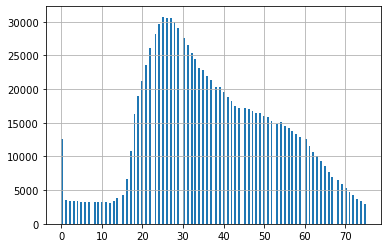

In [1654]:
#plot a histogram
cln_people['AGE'].hist(bins='auto');

Now we haave to deal with the missing values for the Age column. There are almost 500k records missing age values. This is a very large number so we can't drop these. We can impute values using the person type column. For drivers, we will use the median age from the records of that specific category.

In [1655]:
#impute the values of age for the driver person type
cln_people[cln_people['PERSON_TYPE'] == 'DRIVER']['AGE'].fillna(
                                            cln_people[cln_people['PERSON_TYPE'] == 'DRIVER']['AGE'].median(), 
                                            inplace= True)

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_4590/3145763907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_people[cln_people['PERSON_TYPE'] == 'DRIVER']['AGE'].fillna(


In [1656]:
#impute the values of age for the passenger person type
cln_people[cln_people['PERSON_TYPE'] == 'PASSENGER']['AGE'].fillna(
                                            cln_people[cln_people['PERSON_TYPE'] == 'PASSENGER']['AGE'].median(), 
                                            inplace= True)

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_4590/3282200883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_people[cln_people['PERSON_TYPE'] == 'PASSENGER']['AGE'].fillna(


In [1657]:
#impute the values of age for the pedestrian person type
cln_people[cln_people['PERSON_TYPE'] == 'PEDESTRIAN']['AGE'].fillna(
                                            cln_people[cln_people['PERSON_TYPE'] == 'PEDESTRIAN']['AGE'].median(), 
                                            inplace= True)

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_4590/1623271779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_people[cln_people['PERSON_TYPE'] == 'PEDESTRIAN']['AGE'].fillna(


In [1658]:
#impute the values of age for the biycle person type
cln_people[cln_people['PERSON_TYPE'] == 'BICYCLE']['AGE'].fillna(
                                                cln_people[cln_people['PERSON_TYPE'] == 'BICYCLE']['AGE'].median(), 
                                                inplace= True)

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_4590/3840521133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_people[cln_people['PERSON_TYPE'] == 'BICYCLE']['AGE'].fillna(


In [1659]:
#impute the values of age for the NON-MOTOR VEHICLE person type
cln_people[cln_people['PERSON_TYPE'] == 'NON-MOTOR VEHICLE']['AGE'].fillna(
                                    cln_people[cln_people['PERSON_TYPE'] == 'NON-MOTOR VEHICLE']['AGE'].median(), 
                                    inplace= True)

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_4590/4054670313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_people[cln_people['PERSON_TYPE'] == 'NON-MOTOR VEHICLE']['AGE'].fillna(


In [1660]:
#impute the values of age for the NON-CONTACT VEHICLE person type
cln_people[cln_people['PERSON_TYPE'] == 'NON-CONTACT VEHICLE']['AGE'].fillna(
                                    cln_people[cln_people['PERSON_TYPE'] == 'NON-CONTACT VEHICLE']['AGE'].median(), 
                                    inplace= True)

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_4590/2648944902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_people[cln_people['PERSON_TYPE'] == 'NON-CONTACT VEHICLE']['AGE'].fillna(


Lets take a look at the distribution again

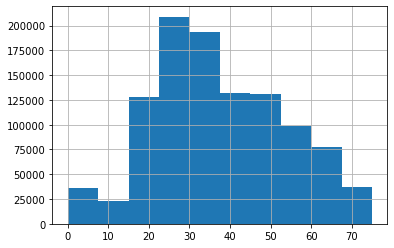

In [1661]:
#plot the histogram
cln_people['AGE'].hist();

In [1662]:
#check dataframe info
cln_people.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1065747 entries, 0 to 1530383
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_TYPE            1065747 non-null  object 
 1   CRASH_RECORD_ID        1065747 non-null  object 
 2   VEHICLE_ID             1040480 non-null  float64
 3   AGE                    1065747 non-null  float64
 4   SAFETY_EQUIPMENT       1062718 non-null  object 
 5   INJURY_CLASSIFICATION  1065722 non-null  object 
 6   DRIVER_ACTION          877978 non-null   object 
 7   DRIVER_VISION          877639 non-null   object 
 8   PHYSICAL_CONDITION     878764 non-null   object 
 9   PEDPEDAL_ACTION        24714 non-null    object 
 10  BAC_RESULT VALUE       1793 non-null     float64
dtypes: float64(3), object(8)
memory usage: 97.6+ MB


Next we will tackle the Safety Equipment column. There are a few missing values which we will explore how to tackle. There are also a lot of categoricaal values in this column. The informaation that we are trying to extract from this column is whether safety equipment was used or not. There are also some unkown values that we have to tackle.

We can drop the records with missing values because they are a small perentage of the total and then group the remaining categories. First, lets take a look at the categories in this column.

In [1663]:
#drop missing values
cln_people = cln_people.dropna(subset=['SAFETY_EQUIPMENT'])

In [1664]:
#check info
cln_people.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062718 entries, 0 to 1530383
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_TYPE            1062718 non-null  object 
 1   CRASH_RECORD_ID        1062718 non-null  object 
 2   VEHICLE_ID             1040473 non-null  float64
 3   AGE                    1062718 non-null  float64
 4   SAFETY_EQUIPMENT       1062718 non-null  object 
 5   INJURY_CLASSIFICATION  1062707 non-null  object 
 6   DRIVER_ACTION          876229 non-null   object 
 7   DRIVER_VISION          876088 non-null   object 
 8   PHYSICAL_CONDITION     876429 non-null   object 
 9   PEDPEDAL_ACTION        21735 non-null    object 
 10  BAC_RESULT VALUE       1792 non-null     float64
dtypes: float64(3), object(8)
memory usage: 97.3+ MB


In [1665]:
#check value counts
cln_people['SAFETY_EQUIPMENT'].value_counts()

SAFETY BELT USED                              641119
USAGE UNKNOWN                                 354429
NONE PRESENT                                   38030
SAFETY BELT NOT USED                            6816
CHILD RESTRAINT USED                            5894
HELMET NOT USED                                 5534
CHILD RESTRAINT - FORWARD FACING                2490
BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)      2129
CHILD RESTRAINT - REAR FACING                   1278
CHILD RESTRAINT - TYPE UNKNOWN                  1273
HELMET USED                                     1267
DOT COMPLIANT MOTORCYCLE HELMET                  857
BOOSTER SEAT                                     730
CHILD RESTRAINT NOT USED                         395
NOT DOT COMPLIANT MOTORCYCLE HELMET              133
SHOULD/LAP BELT USED IMPROPERLY                  129
WHEELCHAIR                                       109
CHILD RESTRAINT USED IMPROPERLY                   89
STRETCHER                                     

In [1666]:
#create a lists of categories for Indication thta Safety equipment was used
sf_equip = ['SAFETY BELT USED', 'CHILD RESTRAINT USED', 'CHILD RESTRAINT - FORWARD FACING', 
            'BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)', 'CHILD RESTRAINT - TYPE UNKNOWN',
           'CHILD RESTRAINT - REAR FACING', 'HELMET USED', 'DOT COMPLIANT MOTORCYCLE HELMET',
           'BOOSTER SEAT', 'WHEELCHAIR', 'STRETCHER']

#set up a lambda functin for grouping categories into 2 bins:
#Equipment Used and Not Used/Misused
f1 = (lambda x: 'SAFETY EQUIPMENT USED' if x in sf_equip 
      else ('USAGE UNKNOWN' if x =='USAGE UNKNOWN' else 'SAFETY EQUIPMENT MISSING/MISUSED'))

In [1667]:
#bin ccategories
cln_people['SAFETY_EQUIPMENT'] = cln_people['SAFETY_EQUIPMENT'].map(f1)

In [1668]:
cln_people['SAFETY_EQUIPMENT'].value_counts()

SAFETY EQUIPMENT USED               657163
USAGE UNKNOWN                       354429
SAFETY EQUIPMENT MISSING/MISUSED     51126
Name: SAFETY_EQUIPMENT, dtype: int64

We will keep the Usage Unkown category for now since it is a large chunk of the dataset and reevaluate after merging to see how to deal with it.

Neext is Injury Classifiation which also has a come missing values. The purpose of this column is to understand whether there was any injury/fatality or not. Therefore we will grooup categories accordingly. First, Lets check the value contents and go from there. 

In [1669]:
#checkk value counts
cln_people['INJURY_CLASSIFICATION'].value_counts()

NO INDICATION OF INJURY     947526
NONINCAPACITATING INJURY     64936
REPORTED, NOT EVIDENT        37511
INCAPACITATING INJURY        12085
FATAL                          649
Name: INJURY_CLASSIFICATION, dtype: int64

We can group together the multiple categories into 2 categories of Injury and No Injury. 

Also, we can assume that an injury is something that is very evident and involves emeergency responsee in crashes. For missing values, we can impute the values with No Indication of Injury.

In [1670]:
#impute missing values
cln_people['INJURY_CLASSIFICATION'].fillna('NO INDICATION OF INJURY',inplace=True)

In [1671]:
#bin categories

#INJURY
cln_people['INJURY_CLASSIFICATION'].replace(['NONINCAPACITATING INJURY', 'REPORTED, NOT EVIDENT',
                                             'INCAPACITATING INJURY', 'FATAL'
                                            ], 'INJUIRY', inplace=True)

In [1672]:
#check new value counts
cln_people['INJURY_CLASSIFICATION'].value_counts()

NO INDICATION OF INJURY    947537
INJUIRY                    115181
Name: INJURY_CLASSIFICATION, dtype: int64

In [1673]:
#check info
cln_people.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062718 entries, 0 to 1530383
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_TYPE            1062718 non-null  object 
 1   CRASH_RECORD_ID        1062718 non-null  object 
 2   VEHICLE_ID             1040473 non-null  float64
 3   AGE                    1062718 non-null  float64
 4   SAFETY_EQUIPMENT       1062718 non-null  object 
 5   INJURY_CLASSIFICATION  1062718 non-null  object 
 6   DRIVER_ACTION          876229 non-null   object 
 7   DRIVER_VISION          876088 non-null   object 
 8   PHYSICAL_CONDITION     876429 non-null   object 
 9   PEDPEDAL_ACTION        21735 non-null    object 
 10  BAC_RESULT VALUE       1792 non-null     float64
dtypes: float64(3), object(8)
memory usage: 97.3+ MB


Lets check the Driver Action Column next. We saw earlier that the Pedestrian Person Type didn't have any values for this column. Lets explore whhat the division of person types is for the missing values in the Driver Action column.

In [1674]:
#check person type vaalue counts
cln_people.PERSON_TYPE.value_counts()

DRIVER                 854811
PASSENGER              185993
PEDESTRIAN              12764
BICYCLE                  8792
NON-MOTOR VEHICLE         277
NON-CONTACT VEHICLE        81
Name: PERSON_TYPE, dtype: int64

In [1675]:
#check person type split for driver aactino null values
cln_people[cln_people['DRIVER_ACTION'].isnull()].PERSON_TYPE.value_counts()

PASSENGER            185993
PEDESTRIAN              400
BICYCLE                  89
NON-MOTOR VEHICLE         7
Name: PERSON_TYPE, dtype: int64

All the Passenger person type records can be populated with 'Not a Driver' category and the rest can be dropped.

In [1676]:
#replace the passenger person type null values in driver aaction column with PASSENGER
cln_people.loc[cln_people.PERSON_TYPE == 'PASSENGER', 'DRIVER_ACTION'] = cln_people.DRIVER_ACTION.fillna(
                                                                                'PASSENGER')

In [1677]:
#check person type split for driver aactino null values
cln_people[cln_people['DRIVER_ACTION'].isnull()].PERSON_TYPE.value_counts()

PEDESTRIAN           400
BICYCLE               89
NON-MOTOR VEHICLE      7
Name: PERSON_TYPE, dtype: int64

In [1678]:
#drop records with null values in the Driver Action column
cln_people.dropna(subset=['DRIVER_ACTION'],inplace=True)

In [1679]:
#check new value counts
cln_people['DRIVER_ACTION'].value_counts()

NONE                                 395225
PASSENGER                            185993
UNKNOWN                              152429
OTHER                                 84170
FAILED TO YIELD                       78998
FOLLOWED TOO CLOSELY                  50961
IMPROPER TURN                         22215
IMPROPER BACKING                      22027
IMPROPER LANE CHANGE                  19951
IMPROPER PASSING                      13647
DISREGARDED CONTROL DEVICES           13157
TOO FAST FOR CONDITIONS               12684
WRONG WAY/SIDE                         2716
IMPROPER PARKING                       2603
OVERCORRECTED                          1513
CELL PHONE USE OTHER THAN TEXTING      1343
EVADING POLICE VEHICLE                 1148
EMERGENCY VEHICLE ON CALL               926
TEXTING                                 351
STOPPED SCHOOL BUS                      121
LICENSE RESTRICTIONS                     44
Name: DRIVER_ACTION, dtype: int64

In [1680]:
cln_people.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062222 entries, 0 to 1530383
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_TYPE            1062222 non-null  object 
 1   CRASH_RECORD_ID        1062222 non-null  object 
 2   VEHICLE_ID             1040473 non-null  float64
 3   AGE                    1062222 non-null  float64
 4   SAFETY_EQUIPMENT       1062222 non-null  object 
 5   INJURY_CLASSIFICATION  1062222 non-null  object 
 6   DRIVER_ACTION          1062222 non-null  object 
 7   DRIVER_VISION          875919 non-null   object 
 8   PHYSICAL_CONDITION     876134 non-null   object 
 9   PEDPEDAL_ACTION        21243 non-null    object 
 10  BAC_RESULT VALUE       1792 non-null     float64
dtypes: float64(3), object(8)
memory usage: 97.2+ MB


Next we haave to clean the Driver Vision column. This column also has several missing values which we ssaw earlier can mostly be Passenger person type which can be replaced with the Passenger category. Therefre lets first take a look at the missing values for this column.

In [1681]:
#check person type split for driver aactino null values
cln_people[cln_people['DRIVER_VISION'].isnull()].PERSON_TYPE.value_counts()

PASSENGER            185993
PEDESTRIAN              247
BICYCLE                  59
NON-MOTOR VEHICLE         4
Name: PERSON_TYPE, dtype: int64

In [1682]:
#replace the passenger person type null values in driver vision column with PASSENGER
cln_people.loc[cln_people.PERSON_TYPE == 'PASSENGER', 'DRIVER_VISION'] = cln_people.DRIVER_VISION.fillna(
                                                                                'PASSENGER')

In [1683]:
#check person type split for driver vision null values
cln_people[cln_people['DRIVER_VISION'].isnull()].PERSON_TYPE.value_counts()

PEDESTRIAN           247
BICYCLE               59
NON-MOTOR VEHICLE      4
Name: PERSON_TYPE, dtype: int64

In [1684]:
#drop the other records with the missing values becaue they are a very small percentage of the total dataset
#drop records with null values in the Driver Vision column
cln_people.dropna(subset=['DRIVER_VISION'],inplace=True)

In [1685]:
#check total number of remaining null values in driver vision column
#should be zero
cln_people['DRIVER_VISION'].isnull().sum()

0

The purpose of this column is to understand whether obstructed driver vision played a part in the crash or not. We can Group the different categories into two main bins; 1. Obscured, 2. Not Obscured

In [1686]:
#check value counts
cln_people['DRIVER_VISION'].value_counts()

NOT OBSCURED              580090
UNKNOWN                   268389
PASSENGER                 185993
OTHER                      10936
MOVING VEHICLES             6659
PARKED VEHICLES             4106
WINDSHIELD (WATER/ICE)      3144
BLINDED - SUNLIGHT          1330
TREES, PLANTS                497
BUILDINGS                    401
BLINDED - HEADLIGHTS         105
HILLCREST                     89
BLOWING MATERIALS             75
EMBANKMENT                    68
SIGNBOARD                     30
Name: DRIVER_VISION, dtype: int64

In [1687]:
#bin category
cln_people['DRIVER_VISION'].replace(['MOVING VEHICLES',
                                    'PARKED VEHICLES',
                                    'WINDSHIELD (WATER/ICE)',
                                    'BLINDED - SUNLIGHT',
                                    'TREES, PLANTS',
                                    'BUILDINGS',
                                    'BLINDED - HEADLIGHTS',
                                    'HILLCREST',
                                    'BLOWING MATERIALS',
                                    'EMBANKMENT',
                                    'SIGNBOARD', 'OTHER'], 'OBSCURED', inplace=True)

In [1688]:
#check new value counts
cln_people['DRIVER_VISION'].value_counts()

NOT OBSCURED    580090
UNKNOWN         268389
PASSENGER       185993
OBSCURED         27440
Name: DRIVER_VISION, dtype: int64

In [1689]:
#check info
cln_people.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1061912 entries, 0 to 1530383
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_TYPE            1061912 non-null  object 
 1   CRASH_RECORD_ID        1061912 non-null  object 
 2   VEHICLE_ID             1040473 non-null  float64
 3   AGE                    1061912 non-null  float64
 4   SAFETY_EQUIPMENT       1061912 non-null  object 
 5   INJURY_CLASSIFICATION  1061912 non-null  object 
 6   DRIVER_ACTION          1061912 non-null  object 
 7   DRIVER_VISION          1061912 non-null  object 
 8   PHYSICAL_CONDITION     875872 non-null   object 
 9   PEDPEDAL_ACTION        20936 non-null    object 
 10  BAC_RESULT VALUE       1792 non-null     float64
dtypes: float64(3), object(8)
memory usage: 97.2+ MB


Next is the Physial Condition Column. We know from previous exploration that Passengers will be the biggest contributors to the missing data in this column because this feature concerns the driver's physical condition at the time of crash. Therefore we will perform similar imputation as in the previoous cases.


The primary focus of using this column is to understand whether the driver's condition was impaired or not. Thoose will be the 2 categories that the available categories will be binned as.

Also there are multiple catgories in this column, as explored earlier. A big chunk of the data is Unknown. Considering that if the driver's condition would have been explicitlly normal, it would have been obvious, the unknown and other category can be categorized as Impaired.

In [1690]:
#check person type split for physical condition null values
cln_people[cln_people['PHYSICAL_CONDITION'].isnull()].PERSON_TYPE.value_counts()

PASSENGER              185993
PEDESTRIAN                 27
BICYCLE                    17
NON-MOTOR VEHICLE           2
NON-CONTACT VEHICLE         1
Name: PERSON_TYPE, dtype: int64

In [1691]:
#replace the passenger person type null values in physical condition column with PASSENGER
cln_people.loc[cln_people.PERSON_TYPE == 'PASSENGER', 'PHYSICAL_CONDITION'] = cln_people.PHYSICAL_CONDITION.fillna(
                                                                                'PASSENGER')

In [1692]:
#drop the other records with the missing values becaue they are a very small percentage of the total dataset
#drop records with null values in the Physical Condition column
cln_people.dropna(subset=['PHYSICAL_CONDITION'],inplace=True)

In [1693]:
#check total number of remaining null values
#should be zero
cln_people['PHYSICAL_CONDITION'].isnull().sum()

0

In [1694]:
#check value counts
cln_people['PHYSICAL_CONDITION'].value_counts()

NORMAL                          735810
PASSENGER                       185993
UNKNOWN                         119897
IMPAIRED - ALCOHOL                5054
REMOVED BY EMS                    4016
FATIGUED/ASLEEP                   3025
OTHER                             2754
EMOTIONAL                         2489
ILLNESS/FAINTED                   1047
HAD BEEN DRINKING                  764
IMPAIRED - DRUGS                   585
IMPAIRED - ALCOHOL AND DRUGS       291
MEDICATED                          140
Name: PHYSICAL_CONDITION, dtype: int64

In [1695]:
#bin caategories
cln_people['PHYSICAL_CONDITION'].replace(['IMPAIRED - ALCOHOL',
                                    'REMOVED BY EMS',
                                    'FATIGUED/ASLEEP',
                                    'EMOTIONAL',
                                    'ILLNESS/FAINTED',
                                    'HAD BEEN DRINKING',
                                    'IMPAIRED - DRUGS',
                                    'IMPAIRED - ALCOHOL AND DRUGS',
                                    'MEDICATED', 'UNKNOWN', 'OTHER'], 'IMPAIRED', inplace=True)

In [1696]:
#check new value counts
cln_people['PHYSICAL_CONDITION'].value_counts()

NORMAL       735810
PASSENGER    185993
IMPAIRED     140062
Name: PHYSICAL_CONDITION, dtype: int64

In [1697]:
#check info
cln_people.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1061865 entries, 0 to 1530383
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_TYPE            1061865 non-null  object 
 1   CRASH_RECORD_ID        1061865 non-null  object 
 2   VEHICLE_ID             1040472 non-null  float64
 3   AGE                    1061865 non-null  float64
 4   SAFETY_EQUIPMENT       1061865 non-null  object 
 5   INJURY_CLASSIFICATION  1061865 non-null  object 
 6   DRIVER_ACTION          1061865 non-null  object 
 7   DRIVER_VISION          1061865 non-null  object 
 8   PHYSICAL_CONDITION     1061865 non-null  object 
 9   PEDPEDAL_ACTION        20891 non-null    object 
 10  BAC_RESULT VALUE       1792 non-null     float64
dtypes: float64(3), object(8)
memory usage: 97.2+ MB


Next we look at the PedPEdal Action Column which focuses on the aaction of the pedestriaan or cyclist at the time of crash. There are a lot of missisng but considering that the values in this column are focusing only on Pedestraiaan and bicyclist, it might be posssible that the missing value are drivers and passsengerss.

We will evaluate the person type for the null values in this column and then investigate the non null values.

In [1698]:
#check value counts for person type
cln_people['PERSON_TYPE'].value_counts()

DRIVER                 854811
PASSENGER              185993
PEDESTRIAN              12090
BICYCLE                  8627
NON-MOTOR VEHICLE         264
NON-CONTACT VEHICLE        80
Name: PERSON_TYPE, dtype: int64

In [1699]:
#check person type split for physical condition null values
cln_people[cln_people['PEDPEDAL_ACTION'].isnull()].PERSON_TYPE.value_counts()

DRIVER                 854811
PASSENGER              185993
NON-MOTOR VEHICLE         101
NON-CONTACT VEHICLE        68
PEDESTRIAN                  1
Name: PERSON_TYPE, dtype: int64

Looks like most of the non null values are either drivers or passengers which is what was expected. We can replace Drivers and Passengers with their categories explicitly.

In [1700]:
#replace the passenger person type null values in pedpedal actin column with PASSENGER
cln_people.loc[cln_people.PERSON_TYPE == 'PASSENGER', 'PEDPEDAL_ACTION'] = cln_people.PEDPEDAL_ACTION.fillna(
                                                                                'PASSENGER')

#replace the driver person type null values in pedpedal actin column with DRIVER
cln_people.loc[cln_people.PERSON_TYPE == 'DRIVER', 'PEDPEDAL_ACTION'] = cln_people.PEDPEDAL_ACTION.fillna(
                                                                                'DRIVER')

In [1701]:
#check the new person type split for physical condition null values
cln_people[cln_people['PEDPEDAL_ACTION'].isnull()].PERSON_TYPE.value_counts()

NON-MOTOR VEHICLE      101
NON-CONTACT VEHICLE     68
PEDESTRIAN               1
Name: PERSON_TYPE, dtype: int64

In [1702]:
#drop the remaining missing values
cln_people.dropna(subset=['PEDPEDAL_ACTION'],inplace=True)

In [1703]:
#check the new person type split for physical condition non null values
cln_people[cln_people['PEDPEDAL_ACTION'].notnull()].PERSON_TYPE.value_counts()

DRIVER                 854811
PASSENGER              185993
PEDESTRIAN              12089
BICYCLE                  8627
NON-MOTOR VEHICLE         163
NON-CONTACT VEHICLE        12
Name: PERSON_TYPE, dtype: int64

In [1704]:
cln_people['PEDPEDAL_ACTION'].value_counts()

DRIVER                                               854811
PASSENGER                                            185993
CROSSING - WITH SIGNAL                                 4346
WITH TRAFFIC                                           3682
OTHER ACTION                                           2493
UNKNOWN/NA                                             2382
NO ACTION                                              1190
CROSSING - NO CONTROLS (NOT AT INTERSECTION)           1155
CROSSING - NO CONTROLS (AT INTERSECTION)               1009
CROSSING - AGAINST SIGNAL                               933
NOT AT INTERSECTION                                     724
AGAINST TRAFFIC                                         637
CROSSING - CONTROLS PRESENT (NOT AT INTERSECTION)       585
STANDING IN ROADWAY                                     454
TURNING LEFT                                            323
PARKED VEHICLE                                          245
ENTER FROM DRIVE/ALLEY                  

In [1705]:
cln_people.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1061695 entries, 0 to 1530383
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_TYPE            1061695 non-null  object 
 1   CRASH_RECORD_ID        1061695 non-null  object 
 2   VEHICLE_ID             1040420 non-null  float64
 3   AGE                    1061695 non-null  float64
 4   SAFETY_EQUIPMENT       1061695 non-null  object 
 5   INJURY_CLASSIFICATION  1061695 non-null  object 
 6   DRIVER_ACTION          1061695 non-null  object 
 7   DRIVER_VISION          1061695 non-null  object 
 8   PHYSICAL_CONDITION     1061695 non-null  object 
 9   PEDPEDAL_ACTION        1061695 non-null  object 
 10  BAC_RESULT VALUE       1792 non-null     float64
dtypes: float64(3), object(8)
memory usage: 97.2+ MB


NExt, we will look at the BAC result value column. This column has a lot of missing values. The main information that we want to extract from this column is identifying whether the driver was intoxicated or not. 

We will first check the person type splits for the null values in this column and explore further from there.

In [1706]:
#check value counts for person type
cln_people['PERSON_TYPE'].value_counts()

DRIVER                 854811
PASSENGER              185993
PEDESTRIAN              12089
BICYCLE                  8627
NON-MOTOR VEHICLE         163
NON-CONTACT VEHICLE        12
Name: PERSON_TYPE, dtype: int64

In [1707]:
#check the new person type splits
cln_people[cln_people['BAC_RESULT VALUE'].isnull()].PERSON_TYPE.value_counts()

DRIVER                 853023
PASSENGER              185993
PEDESTRIAN              12087
BICYCLE                  8625
NON-MOTOR VEHICLE         163
NON-CONTACT VEHICLE        12
Name: PERSON_TYPE, dtype: int64

In [1708]:
#check the new person type splits for non null values
cln_people[cln_people['BAC_RESULT VALUE'].notnull()].PERSON_TYPE.value_counts()

DRIVER        1788
BICYCLE          2
PEDESTRIAN       2
Name: PERSON_TYPE, dtype: int64

Looks like the values in this column are for only drivers, biycle and Pedestrians. We will use the values from this column and the general standard to populate aa neew column indicating if the person was intxicated or not.

In [1709]:
#chek value counts
cln_people['BAC_RESULT VALUE'].value_counts()

0.00    172
0.17    127
0.18    126
0.21    110
0.14    102
0.20     94
0.16     89
0.19     83
0.15     76
0.22     75
0.23     69
0.12     66
0.13     66
0.11     64
0.24     59
0.26     40
0.25     39
0.10     33
0.27     33
0.09     31
0.28     28
0.29     18
0.08     18
0.03     17
0.07     16
0.30     16
0.04     15
0.33     15
0.05     10
0.32      9
0.35      9
0.06      8
0.02      8
0.31      7
0.38      6
0.34      4
0.36      4
0.01      3
0.39      3
0.44      3
0.88      2
0.45      2
0.60      2
0.79      2
1.00      2
0.85      1
0.37      1
0.67      1
0.41      1
0.80      1
0.95      1
0.58      1
0.99      1
0.47      1
0.40      1
0.98      1
Name: BAC_RESULT VALUE, dtype: int64

Legally people are not allowed to drive with a BAC greater than 0.8. We will ussee that as our baaseline for categorizing whether a person waas intoxicated or not. 

We also have some very high values for BAC which do not make sensee considering BAC 0.30% to 0.40%: In this percentage range, you'll likely have alcohol poisoning, a potentially life-threatening condition, and experience loss of consciousness. BAC Over 0.40%: This is a potentially fatal blood alcohol level.

Therefore we will drop records with BAC greater than 0.40 beccause it would be nearly impossible for people with that high of a BAC to be on the streets.

In [1710]:
#drop records
cln_people.drop((cln_people[cln_people['BAC_RESULT VALUE']>0.40].index),inplace=True) 

In [1711]:
#check new value counts
cln_people['BAC_RESULT VALUE'].value_counts()

0.00    172
0.17    127
0.18    126
0.21    110
0.14    102
0.20     94
0.16     89
0.19     83
0.15     76
0.22     75
0.23     69
0.12     66
0.13     66
0.11     64
0.24     59
0.26     40
0.25     39
0.10     33
0.27     33
0.09     31
0.28     28
0.08     18
0.29     18
0.03     17
0.30     16
0.07     16
0.33     15
0.04     15
0.05     10
0.35      9
0.32      9
0.02      8
0.06      8
0.31      7
0.38      6
0.36      4
0.34      4
0.39      3
0.01      3
0.37      1
0.40      1
Name: BAC_RESULT VALUE, dtype: int64

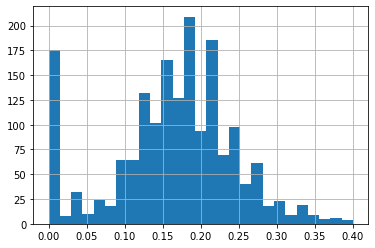

In [1712]:
cln_people['BAC_RESULT VALUE'].hist(bins='auto');

In [1713]:
#create new column for intoxication indication using BAC results value

#create a lambda function for maapping purposes
e = lambda x: 'Y' if x > 0.08 else 'N'

#map the funtion and create the new column
cln_people.INTOXICATED_I = cln_people['BAC_RESULT VALUE'].map(e)

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_4590/561118423.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  cln_people.INTOXICATED_I = cln_people['BAC_RESULT VALUE'].map(e)


In [1714]:
#check value counts
cln_people.INTOXICATED_I.value_counts()

N    1060170
Y       1503
Name: BAC_RESULT VALUE, dtype: int64

In [1715]:
#drop BAC result value column
cln_people = cln_people.drop(['BAC_RESULT VALUE'], axis=1)

In [1716]:
cln_people.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1061673 entries, 0 to 1530383
Data columns (total 10 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_TYPE            1061673 non-null  object 
 1   CRASH_RECORD_ID        1061673 non-null  object 
 2   VEHICLE_ID             1040398 non-null  float64
 3   AGE                    1061673 non-null  float64
 4   SAFETY_EQUIPMENT       1061673 non-null  object 
 5   INJURY_CLASSIFICATION  1061673 non-null  object 
 6   DRIVER_ACTION          1061673 non-null  object 
 7   DRIVER_VISION          1061673 non-null  object 
 8   PHYSICAL_CONDITION     1061673 non-null  object 
 9   PEDPEDAL_ACTION        1061673 non-null  object 
dtypes: float64(2), object(8)
memory usage: 89.1+ MB


In [1717]:
#drop vehicle ID column
cln_people = cln_people.drop(['VEHICLE_ID'], axis=1)

Now we can move onto merging the all the daatasets together.

In [1718]:
# merge veh_crsh with peoples cleaned dataset on crash record id
veh_crsh_ppl = pd.merge(veh_crsh, cln_people, how='inner', on='CRASH_RECORD_ID' )

In [1719]:
#preview the first 5 rows
veh_crsh_ppl.head()

,CRASH_RECORD_ID,CRASH_YEAR,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,CRASH_TYPE,INTERSECTION_RELATED_I,ROAD_DEFECT,PRIM_CONTRIBUTORY_CAUSE,...,VEHICLE_DEFECT_I,OCCUPANT_CAT,PERSON_TYPE,AGE,SAFETY_EQUIPMENT,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019,30,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,RECKLESS/IMPROPER DRIVING,...,N,1-2,PASSENGER,27.0,SAFETY EQUIPMENT USED,NO INDICATION OF INJURY,PASSENGER,PASSENGER,PASSENGER,PASSENGER
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019,30,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,RECKLESS/IMPROPER DRIVING,...,N,1-2,DRIVER,22.0,SAFETY EQUIPMENT USED,INJUIRY,IMPROPER TURN,UNKNOWN,NORMAL,DRIVER
2,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019,30,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,RECKLESS/IMPROPER DRIVING,...,N,1-2,DRIVER,56.0,SAFETY EQUIPMENT USED,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,DRIVER
3,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019,30,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,RECKLESS/IMPROPER DRIVING,...,N,1-2,PASSENGER,27.0,SAFETY EQUIPMENT USED,NO INDICATION OF INJURY,PASSENGER,PASSENGER,PASSENGER,PASSENGER
4,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019,30,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,RECKLESS/IMPROPER DRIVING,...,N,1-2,DRIVER,22.0,SAFETY EQUIPMENT USED,INJUIRY,IMPROPER TURN,UNKNOWN,NORMAL,DRIVER


In [1720]:
veh_crsh_ppl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534692 entries, 0 to 534691
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          534692 non-null  object 
 1   CRASH_YEAR               534692 non-null  int64  
 2   POSTED_SPEED_LIMIT       534692 non-null  int64  
 3   DEVICE_CONDITION         534692 non-null  object 
 4   WEATHER_CONDITION        534692 non-null  object 
 5   LIGHTING_CONDITION       534692 non-null  object 
 6   CRASH_TYPE               534692 non-null  object 
 7   INTERSECTION_RELATED_I   534692 non-null  object 
 8   ROAD_DEFECT              534692 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  534692 non-null  object 
 10  NUM_UNITS                534692 non-null  int64  
 11  WORK_ZONE_I              534692 non-null  object 
 12  WORKERS_PRESENT_I        534692 non-null  object 
 13  INJURIES_TOTAL           534692 non-null  float64
 14  INJU

Lets take a look at the unkown categories we left behind in the vehicles database. If the number of records with unkown values has gone down, we will drop the unknown values. In the scenario where they haven't, we will have to deal with them accordingly.

In [1721]:
#check value counts of vehicle type
veh_crsh_ppl.VEHICLE_TYPE.value_counts()

REGULAR PERSONAL    500908
UNKNOWN/NA           15787
COMMERCIAL           11948
PUBLIC                6049
Name: VEHICLE_TYPE, dtype: int64

In [1722]:
#drop records with unknown values in the vehicle type column
veh_crsh_ppl = veh_crsh_ppl[veh_crsh_ppl.VEHICLE_TYPE != 'UNKNOWN/NA']

In [1723]:
#check value counts of MANEUVER
veh_crsh_ppl.MANEUVER.value_counts()

STRAIGHT                    317756
TURNING                      77729
START/STOP                   47605
ENTERING/EXITING TRAFFIC     40080
LANE CHANGE                  14331
UNKNOWN/NA                    9393
EXTERNAL OBSTRUCTIONS         7064
BACKING                       3415
DRIVING WRONG WAY             1532
Name: MANEUVER, dtype: int64

In [1724]:
#drop records with unknown values in the MANEUVER column
veh_crsh_ppl = veh_crsh_ppl[veh_crsh_ppl.MANEUVER != 'UNKNOWN/NA']

In [1725]:
#check new value counts of MANEUVER
veh_crsh_ppl.MANEUVER.value_counts()

STRAIGHT                    317756
TURNING                      77729
START/STOP                   47605
ENTERING/EXITING TRAFFIC     40080
LANE CHANGE                  14331
EXTERNAL OBSTRUCTIONS         7064
BACKING                       3415
DRIVING WRONG WAY             1532
Name: MANEUVER, dtype: int64

In [1726]:
#check value counts of FIRST_CONTACT_POINT
veh_crsh_ppl.FIRST_CONTACT_POINT.value_counts()

FRONT                148418
OTHER                113946
REAR                 101427
TOTAL (ALL AREAS)     54697
SIDE                  50269
TOP/BOTTOM            29538
UNKNOWN                9370
NONE                   1847
Name: FIRST_CONTACT_POINT, dtype: int64

In [1727]:
#drop records with unknown values in the FIRST_CONTACT_POINT column
veh_crsh_ppl = veh_crsh_ppl[veh_crsh_ppl.FIRST_CONTACT_POINT != 'UNKNOWN']

In [1728]:
#check new value counts of FIRST_CONTACT_POINT
veh_crsh_ppl.FIRST_CONTACT_POINT.value_counts()

FRONT                148418
OTHER                113946
REAR                 101427
TOTAL (ALL AREAS)     54697
SIDE                  50269
TOP/BOTTOM            29538
NONE                   1847
Name: FIRST_CONTACT_POINT, dtype: int64

In [1729]:
#check value counts of VEHICLE_DEFECT_I
veh_crsh_ppl.VEHICLE_DEFECT_I.value_counts()

N    297389
U    195608
Y      7145
Name: VEHICLE_DEFECT_I, dtype: int64

The number of unkowns in this column are still very high. Unfortunately, there is not enough information to impute these values. We will carry them forward into our modeling because there might be other variabless that link with it to form a trend of the causes of traffic accidents.

In [1730]:
veh_crsh_ppl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500142 entries, 0 to 534691
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          500142 non-null  object 
 1   CRASH_YEAR               500142 non-null  int64  
 2   POSTED_SPEED_LIMIT       500142 non-null  int64  
 3   DEVICE_CONDITION         500142 non-null  object 
 4   WEATHER_CONDITION        500142 non-null  object 
 5   LIGHTING_CONDITION       500142 non-null  object 
 6   CRASH_TYPE               500142 non-null  object 
 7   INTERSECTION_RELATED_I   500142 non-null  object 
 8   ROAD_DEFECT              500142 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  500142 non-null  object 
 10  NUM_UNITS                500142 non-null  int64  
 11  WORK_ZONE_I              500142 non-null  object 
 12  WORKERS_PRESENT_I        500142 non-null  object 
 13  INJURIES_TOTAL           500142 non-null  float64
 14  INJU

Next, lets look at processing this merged dataset to prepare it for modelling but first, lets separate out the unable to determine categories from the Primary Contributary Cause column to check later whether our model can provide some insights into what coud have been the causes for it.

In [1731]:
veh_crsh_ppl.PRIM_CONTRIBUTORY_CAUSE.value_counts()

RECKLESS/IMPROPER DRIVING    193372
TRAFFIC RULES VIOLATED       178527
UNABLE TO DETERMINE           70617
COMPROMISED DRIVING           34013
OBSTRUCTIONS                  23613
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

In [1732]:
#separate out unable to determine categories
u_veh_crsh_ppl = veh_crsh_ppl[veh_crsh_ppl.PRIM_CONTRIBUTORY_CAUSE == 'UNABLE TO DETERMINE']

#separate out the rest
veh_crsh_ppl = veh_crsh_ppl[veh_crsh_ppl.PRIM_CONTRIBUTORY_CAUSE != 'UNABLE TO DETERMINE']

Lets take a look at how the dataset looks after filtering out the Unable to Determine causes.

In [1733]:
#unable to determine cause dataset
u_veh_crsh_ppl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70617 entries, 35 to 534691
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CRASH_RECORD_ID          70617 non-null  object 
 1   CRASH_YEAR               70617 non-null  int64  
 2   POSTED_SPEED_LIMIT       70617 non-null  int64  
 3   DEVICE_CONDITION         70617 non-null  object 
 4   WEATHER_CONDITION        70617 non-null  object 
 5   LIGHTING_CONDITION       70617 non-null  object 
 6   CRASH_TYPE               70617 non-null  object 
 7   INTERSECTION_RELATED_I   70617 non-null  object 
 8   ROAD_DEFECT              70617 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  70617 non-null  object 
 10  NUM_UNITS                70617 non-null  int64  
 11  WORK_ZONE_I              70617 non-null  object 
 12  WORKERS_PRESENT_I        70617 non-null  object 
 13  INJURIES_TOTAL           70617 non-null  float64
 14  INJURIES_FATAL      

In [1734]:
#dataset with the causes
veh_crsh_ppl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429525 entries, 0 to 534689
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          429525 non-null  object 
 1   CRASH_YEAR               429525 non-null  int64  
 2   POSTED_SPEED_LIMIT       429525 non-null  int64  
 3   DEVICE_CONDITION         429525 non-null  object 
 4   WEATHER_CONDITION        429525 non-null  object 
 5   LIGHTING_CONDITION       429525 non-null  object 
 6   CRASH_TYPE               429525 non-null  object 
 7   INTERSECTION_RELATED_I   429525 non-null  object 
 8   ROAD_DEFECT              429525 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  429525 non-null  object 
 10  NUM_UNITS                429525 non-null  int64  
 11  WORK_ZONE_I              429525 non-null  object 
 12  WORKERS_PRESENT_I        429525 non-null  object 
 13  INJURIES_TOTAL           429525 non-null  float64
 14  INJU

We don't have any missing values and the unable to determine is a largely significant dataset with almost 70,000 records.

Now we need to encode the categorical columns because ML models are better adept at handling numerical data as compared to categorical data.

In [1735]:
# Finding Category Columns
cat_columns = veh_crsh_ppl.dtypes[veh_crsh_ppl.dtypes == 'object'].index

# Finding unique counts for categorical columns 
cat_unique = veh_crsh_ppl[cat_columns].nunique()

#separate the list of the categorical columns
cat = veh_crsh_ppl[cat_columns].columns

cat

Index(['CRASH_RECORD_ID', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'ROAD_DEFECT', 'PRIM_CONTRIBUTORY_CAUSE', 'WORK_ZONE_I',
       'WORKERS_PRESENT_I', 'VEHICLE_TYPE', 'MANEUVER', 'FIRST_CONTACT_POINT',
       'VEHICLE_DEFECT_I', 'OCCUPANT_CAT', 'PERSON_TYPE', 'SAFETY_EQUIPMENT',
       'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION'],
      dtype='object')

In [1736]:
# Finding Category Columns for the unable to determine dataset
cat_columns_u = u_veh_crsh_ppl.dtypes[u_veh_crsh_ppl.dtypes == 'object'].index

# Finding unique counts for categorical columns 
cat_unique_u = u_veh_crsh_ppl[cat_columns_u].nunique()

#separate the list of the categorical columns
cat_u = u_veh_crsh_ppl[cat_columns_u].columns

cat_u

Index(['CRASH_RECORD_ID', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'ROAD_DEFECT', 'PRIM_CONTRIBUTORY_CAUSE', 'WORK_ZONE_I',
       'WORKERS_PRESENT_I', 'VEHICLE_TYPE', 'MANEUVER', 'FIRST_CONTACT_POINT',
       'VEHICLE_DEFECT_I', 'OCCUPANT_CAT', 'PERSON_TYPE', 'SAFETY_EQUIPMENT',
       'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION'],
      dtype='object')

We will use the caategoricaal columns names to loop through it one by one and label encode the categories in the column using integers from zero onwards

In [1737]:
label_list=[]
label_list_u=[]
for j in cat[1:]: #loop through the categorical variables
    label_encoding = veh_crsh_ppl[j].unique() #separate the unique variables in the specific column
    label_encoding = { label_encoding[i] : i for i in range(len(label_encoding))} #label encode
    label_list.append([j,label_encoding])
    
    
    #do the same thing for the unable to determine dataset
    label_encoding_u = u_veh_crsh_ppl[j].unique()
    label_encoding_u = { label_encoding_u[i] : i for i in range(len(label_encoding_u))}
    label_list_u.append([j,label_encoding])
    
    #encode both datasets
    veh_crsh_ppl[j] = veh_crsh_ppl[j].apply(lambda x : label_encoding[x])
#     print(j, veh_crsh_ppl[j].unique())

    u_veh_crsh_ppl[j] = u_veh_crsh_ppl[j].apply(lambda x : label_encoding_u[x])
#     print(j, u_veh_crsh_ppl[j].unique())

print(label_list)
print(label_list_u)

[['DEVICE_CONDITION', {'FUNCTIONING PROPERLY': 0, 'NOT FUNCTIONING PROPERLY': 1, 'NO CONTROLS': 2}], ['WEATHER_CONDITION', {'CLEAR': 0, 'NOT CLEAR': 1}], ['LIGHTING_CONDITION', {'DAY TIME': 0, 'NIGHT TIME': 1}], ['CRASH_TYPE', {'INJURY AND / OR TOW DUE TO CRASH': 0}], ['INTERSECTION_RELATED_I', {'Y': 0, 'N': 1}], ['ROAD_DEFECT', {'NO DEFECTS': 0, 'DEFECTS': 1}], ['PRIM_CONTRIBUTORY_CAUSE', {'RECKLESS/IMPROPER DRIVING': 0, 'TRAFFIC RULES VIOLATED': 1, 'COMPROMISED DRIVING': 2, 'OBSTRUCTIONS': 3}], ['WORK_ZONE_I', {'N': 0, 'Y': 1}], ['WORKERS_PRESENT_I', {'N': 0, 'Y': 1}], ['VEHICLE_TYPE', {'REGULAR PERSONAL': 0, 'COMMERCIAL': 1, 'PUBLIC': 2}], ['MANEUVER', {'TURNING': 0, 'STRAIGHT': 1, 'START/STOP': 2, 'EXTERNAL OBSTRUCTIONS': 3, 'DRIVING WRONG WAY': 4, 'LANE CHANGE': 5, 'ENTERING/EXITING TRAFFIC': 6, 'BACKING': 7}], ['FIRST_CONTACT_POINT', {'FRONT': 0, 'NONE': 1, 'REAR': 2, 'OTHER': 3, 'SIDE': 4, 'TOTAL (ALL AREAS)': 5, 'TOP/BOTTOM': 6}], ['VEHICLE_DEFECT_I', {'N': 0, 'U': 1, 'Y': 2}],

We filtered out the types of crashes to only keep the ones that had inlved injuries. Considering that crash type has been filtered to only the injuries or fatalities, we can drop this columnm.

In [1738]:
veh_crsh_ppl.drop('CRASH_TYPE', axis= 1, inplace= True)
u_veh_crsh_ppl.drop('CRASH_TYPE', axis= 1, inplace= True)

The Craash Record IDs are more of a primary key for this dataset therefore we will set this aas the index so as not to interfere with our mdelling but still have it available if we need it. After setting the index, we will extract the unique indices so as to keep records relating to the same crash in the same train/test dataset.

In [1743]:
veh_crsh_ppl

,CRASH_YEAR,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,INTERSECTION_RELATED_I,ROAD_DEFECT,PRIM_CONTRIBUTORY_CAUSE,NUM_UNITS,WORK_ZONE_I,...,VEHICLE_DEFECT_I,OCCUPANT_CAT,PERSON_TYPE,AGE,SAFETY_EQUIPMENT,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION
CRASH_RECORD_ID,,,,,,,,,,,,,,,,,,,,,
79c7a2ce89f446262efd86df3d72d18b04ba487024b7c42d58be7bc0ee3b2779be1916679231382b4a4bfe14200bd305d9c6feb7cd70839f863dd944b040212d,2019,30,0,0,0,0,0,0,2,0,...,0,0,0,27.0,0,0,0,0,0,0
79c7a2ce89f446262efd86df3d72d18b04ba487024b7c42d58be7bc0ee3b2779be1916679231382b4a4bfe14200bd305d9c6feb7cd70839f863dd944b040212d,2019,30,0,0,0,0,0,0,2,0,...,0,0,1,22.0,0,1,1,1,1,1
79c7a2ce89f446262efd86df3d72d18b04ba487024b7c42d58be7bc0ee3b2779be1916679231382b4a4bfe14200bd305d9c6feb7cd70839f863dd944b040212d,2019,30,0,0,0,0,0,0,2,0,...,0,0,1,56.0,0,0,2,2,1,1
79c7a2ce89f446262efd86df3d72d18b04ba487024b7c42d58be7bc0ee3b2779be1916679231382b4a4bfe14200bd305d9c6feb7cd70839f863dd944b040212d,2019,30,0,0,0,0,0,0,2,0,...,0,0,0,27.0,0,0,0,0,0,0
79c7a2ce89f446262efd86df3d72d18b04ba487024b7c42d58be7bc0ee3b2779be1916679231382b4a4bfe14200bd305d9c6feb7cd70839f863dd944b040212d,2019,30,0,0,0,0,0,0,2,0,...,0,0,1,22.0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2aab54e2b2e6559f3cfe240f84690dd78a991a5e818ca907234636fbe2b1e1ce89d5aaa15a61976ab1ea8e6935de88ac2771bd9acae6101a39c1f186a40ec9a4,2022,30,0,0,1,0,0,1,2,0,...,1,0,1,29.0,2,0,5,2,1,1
2aab54e2b2e6559f3cfe240f84690dd78a991a5e818ca907234636fbe2b1e1ce89d5aaa15a61976ab1ea8e6935de88ac2771bd9acae6101a39c1f186a40ec9a4,2022,30,0,0,1,0,0,1,2,0,...,0,0,1,57.0,2,0,7,3,1,1
2aab54e2b2e6559f3cfe240f84690dd78a991a5e818ca907234636fbe2b1e1ce89d5aaa15a61976ab1ea8e6935de88ac2771bd9acae6101a39c1f186a40ec9a4,2022,30,0,0,1,0,0,1,2,0,...,0,0,1,29.0,2,0,5,2,1,1


In [1741]:
veh_crsh_ppl.set_index('CRASH_RECORD_ID',inplace=True)

u_veh_crsh_ppl.set_index('CRASH_RECORD_ID',inplace=True)

KeyError: "None of ['CRASH_RECORD_ID'] are in the columns"

In [1744]:
u_veh_crsh_ppl.set_index('CRASH_RECORD_ID',inplace=True)

KeyError: "None of ['CRASH_RECORD_ID'] are in the columns"

In [1746]:
veh_crsh_ppl.PRIM_CONTRIBUTORY_CAUSE.value_counts()

0    193372
1    178527
2     34013
3     23613
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

In [1747]:
# Get the unique indices
groups = veh_crsh_ppl.index.unique()
groups

Index(['79c7a2ce89f446262efd86df3d72d18b04ba487024b7c42d58be7bc0ee3b2779be1916679231382b4a4bfe14200bd305d9c6feb7cd70839f863dd944b040212d',
       '7b3545fb91352d7fc46ba142d9044a5508671db4d01d0226f0a56f7774954d7d98030e5c47efb4aec51122cc57d15a820e826eb99e4559ebae383c5715f637e6',
       '79704e1b747fbf5f740f1255785934dfe659ff910d4782b606f87f714d6a7292cbced2d9f08e091569f06bdd38051ba0bb15ccb125e1f32f16ed5620e05ba305',
       '7b3850c200a1f73cc7c800e48ece28907dc6599da0d905a94b842b362ca7163041da962602dbc4bb6560dd9fe15395b42d971b1dacf6894ff2fff3d8bc59f7f5',
       '0be13986626ce381917a49f7811f38d79ea151cef6b2322903bd4bb7550913142d9e6d41f9026b377d136d94aa589147e79f5116887430079820b042be1c05d3',
       '798cc771c20c11dcc335369c87eb8458964dd30b94bd00498f0b30ccb8d4f78f9bfa9aaad56ed7629ae75c6cf10451b31582783285f24e17bd9aef61805c9907',
       '02b2ca12c9b8702eb0a31619ff12860901a5e02bf584d17292bedbc09feda9261bde4a747d70f59750aa388b3a974d1dcf76770e204961655e623442e7ee013b',
       '0ee9250ed16a3070671

In [1748]:
# checking the shape and final result
print(veh_crsh_ppl.shape)
veh_crsh_ppl.head()

(429525, 31)


,CRASH_YEAR,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,INTERSECTION_RELATED_I,ROAD_DEFECT,PRIM_CONTRIBUTORY_CAUSE,NUM_UNITS,WORK_ZONE_I,...,VEHICLE_DEFECT_I,OCCUPANT_CAT,PERSON_TYPE,AGE,SAFETY_EQUIPMENT,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION
CRASH_RECORD_ID,,,,,,,,,,,,,,,,,,,,,
79c7a2ce89f446262efd86df3d72d18b04ba487024b7c42d58be7bc0ee3b2779be1916679231382b4a4bfe14200bd305d9c6feb7cd70839f863dd944b040212d,2019,30,0,0,0,0,0,0,2,0,...,0,0,0,27.0,0,0,0,0,0,0
79c7a2ce89f446262efd86df3d72d18b04ba487024b7c42d58be7bc0ee3b2779be1916679231382b4a4bfe14200bd305d9c6feb7cd70839f863dd944b040212d,2019,30,0,0,0,0,0,0,2,0,...,0,0,1,22.0,0,1,1,1,1,1
79c7a2ce89f446262efd86df3d72d18b04ba487024b7c42d58be7bc0ee3b2779be1916679231382b4a4bfe14200bd305d9c6feb7cd70839f863dd944b040212d,2019,30,0,0,0,0,0,0,2,0,...,0,0,1,56.0,0,0,2,2,1,1
79c7a2ce89f446262efd86df3d72d18b04ba487024b7c42d58be7bc0ee3b2779be1916679231382b4a4bfe14200bd305d9c6feb7cd70839f863dd944b040212d,2019,30,0,0,0,0,0,0,2,0,...,0,0,0,27.0,0,0,0,0,0,0
79c7a2ce89f446262efd86df3d72d18b04ba487024b7c42d58be7bc0ee3b2779be1916679231382b4a4bfe14200bd305d9c6feb7cd70839f863dd944b040212d,2019,30,0,0,0,0,0,0,2,0,...,0,0,1,22.0,0,1,1,1,1,1


## Modeling and Evaluation

Now we will split our datasets into X and y sets to use for modeling. Before we can start modeling, we still need to deal with the imbalance of the datsets which we will do after splitting int train and test sets to avoid data leakage.

In [1749]:
#split into X and y
X = veh_crsh_ppl.drop('PRIM_CONTRIBUTORY_CAUSE',axis=1)
y = veh_crsh_ppl['PRIM_CONTRIBUTORY_CAUSE']

Xu = u_veh_crsh_ppl.drop('PRIM_CONTRIBUTORY_CAUSE',axis=1)

In [1750]:
from sklearn.model_selection import GroupShuffleSplit

Since we want to keep the records associated with the same crash together, we will use the Group Shuffle Split method to keep these together.

In [1751]:
# Split the indices into train and test sets
group_splitter = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(group_splitter.split(X=X, groups=X.index))

# Get the data for the train and test sets
X_train = X.loc[X.index.isin(X.index[train_idx])]
y_train = y.loc[y.index.isin(X.index[train_idx])]

X_test = X.loc[X.index.isin(X.index[test_idx])]
y_test = y.loc[y.index.isin(X.index[test_idx])]

In [1752]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343194 entries, 79c7a2ce89f446262efd86df3d72d18b04ba487024b7c42d58be7bc0ee3b2779be1916679231382b4a4bfe14200bd305d9c6feb7cd70839f863dd944b040212d to 22a4d7218110c786c6e8394f9843d1185ed506773581445e1a8261e83bbd1de51e60fd43a0637d7d1c2bdad80f40acf6530dd11490e1b14798f6ae83a6354f2b
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CRASH_YEAR              343194 non-null  int64  
 1   POSTED_SPEED_LIMIT      343194 non-null  int64  
 2   DEVICE_CONDITION        343194 non-null  int64  
 3   WEATHER_CONDITION       343194 non-null  int64  
 4   LIGHTING_CONDITION      343194 non-null  int64  
 5   INTERSECTION_RELATED_I  343194 non-null  int64  
 6   ROAD_DEFECT             343194 non-null  int64  
 7   NUM_UNITS               343194 non-null  int64  
 8   WORK_ZONE_I             343194 non-null  int64  
 9   WORKERS_PRESENT_I       343194 non-null  int64

Since we have converted all of our data to numerical formaat, it wuld be helpful to scale the dataset so thaat all of it is on the saame scale and normalized. This way no single column with a lot of categories or columns that have higgh integer value data would bias the model into a poor performance.

We will use standard scaler because itwill normalize our dataset, take care of outliers and be helpful to any gradient descent algorithms we waant to use.

In [1753]:
# Scale the data to ensure that all features have the same range of values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler_u = StandardScaler()
Xu_scaled = scaler_u.fit_transform(Xu)

In [1754]:
# Convert X_train_scaled back to a DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

# Convert X_test_scaled back to a DataFrame
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


Xu_train_scaled_df = pd.DataFrame(Xu_scaled, columns=Xu.columns)

### Random under Sampling

Now, we want to undersample the data to deal with the imabalnce in our dataset. Undersampling is a technique used to address the issue of imbalanced datasets. When the classes in a dataset are imbalanced, the model trained on this dataset may be biased towards the majority class and may have poor performance on the minority class. By undersampling, we reduce the number of instances of the majority class so that the number of instances in the majority class is more balanced with the number of instances in the minority class. This helps to reduce the bias towards the majority class and can lead to improved model performance on the minority class.

We will use sampling_strategy="not minority". This strategy will sample all classes equally, ensuring that the resulting dataset has the same number of records for each category.

In [1755]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [1756]:
# undersample = RandomUnderSampler(sampling_strategy='majority')
# oversample = SMOTE(sampling_strategy='auto', k_neighbors=5)

# # Undersample the majority class
# X_under, y_under = undersample.fit_resample(X_train_scaled_df, y_train)

# # Oversample the minority classes
# X3_resampled, y3_resampled = oversample.fit_resample(X_under, y_under)

In [1757]:
# rus = RandomUnderSampler(sampling_strategy='not minority',random_state=42)
# X1_train_scaled_resampled, y1_train_resampled = rus.fit_resample(X_train_scaled_df, y_train)

In [1758]:
# rus = RandomUnderSampler(sampling_strategy='majority',random_state=42)
# X2_train_scaled_resampled, y2_train_resampled = rus.fit_resample(X_train_scaled_df, y_train)

In [1759]:
y_train.value_counts()

0    154368
1    142577
2     27480
3     18769
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

In [1760]:
y = max(y_train.value_counts())
for x in y_train.value_counts():
    print(x, y, x/y)



154368 154368 1.0
142577 154368 0.9236175891376451
27480 154368 0.17801616915422885
18769 154368 0.12158608001658375


In [1761]:
# Define the ratios for each class
class_ratios = {0: 154368, 1: 142577, 2: 40000, 3: 40000}

# Create the SMOTE object with the specified ratios
oversample = SMOTE(sampling_strategy=class_ratios, k_neighbors=5)

# Oversample the minority classes
X_train_scaled_resampled, y_train_resampled = oversample.fit_resample(X_train_scaled_df, y_train)


In [1762]:
len(X_train_scaled_resampled)

376945

In [1763]:
y_train_resampled.value_counts()

0    154368
1    142577
2     40000
3     40000
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

In [1764]:
# y1_train_resampled.value_counts()

In [1765]:
# y2_train_resampled.value_counts()

In [1766]:
# y3_resampled.value_counts()

In [1767]:
X_test_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86331 entries, 0be13986626ce381917a49f7811f38d79ea151cef6b2322903bd4bb7550913142d9e6d41f9026b377d136d94aa589147e79f5116887430079820b042be1c05d3 to bba25d76519c479b96c5cdf11437ade0e3608c6cc7f88714cd92d8ccd5810a3b9534f6b37ec797cafb4be10cbcb06565c954fd3a69ce9827739d76bca3db9b59
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CRASH_YEAR              86331 non-null  float64
 1   POSTED_SPEED_LIMIT      86331 non-null  float64
 2   DEVICE_CONDITION        86331 non-null  float64
 3   WEATHER_CONDITION       86331 non-null  float64
 4   LIGHTING_CONDITION      86331 non-null  float64
 5   INTERSECTION_RELATED_I  86331 non-null  float64
 6   ROAD_DEFECT             86331 non-null  float64
 7   NUM_UNITS               86331 non-null  float64
 8   WORK_ZONE_I             86331 non-null  float64
 9   WORKERS_PRESENT_I       86331 non-null  float64
 10  INJUR

### Feature Selection

With 30 different features, it will be computationally extremely expensive to model 200,000 records over 30 features. We will use feature selection thrugh the SelectKBest model using the Mutual information method. Mutual information measures the dependence between variables, and can be used to identify which variables have the most information about the target variable. It is a non-parametric method that does not assume a particular functional form of the relationship between the variables therefore we don't have to worry if the relationship between the target and the predictors is linear or not.

Also this will help us identify the features provided us the most information about thee cause. This is one of the things thta Chicago DOT was trying to understand. Based on these features, the DOT can conduct further eexploratory analysis to understand where to make improvements. Therefore we will also save these feaatures for use further.

In [1768]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

In [1769]:
# Apply SelectKBest class to extract top 10 best features
k=10
kbest = SelectKBest(score_func=mutual_info_classif, k=k)
fit = kbest.fit(X_train_scaled_resampled, y_train_resampled)

# Create a new dataframe with only the selected features
selected_features_indices = kbest.get_support(indices=True)
selected_features = pd.DataFrame({'Feature': X_train.columns, 'Score': fit.scores_})
selected_features.sort_values('Score', ascending=False).head(k)

,Feature,Score
15,LATITUDE,0.705820
16,LONGITUDE,0.700675
26,DRIVER_ACTION,0.187368
23,AGE,0.130711
19,FIRST_CONTACT_POINT,0.115025
18,MANEUVER,0.106706
12,CRASH_HOUR,0.095459
5,INTERSECTION_RELATED_I,0.094766
14,CRASH_MONTH,0.084868
13,CRASH_DAY_OF_WEEK,0.073101


For mutual_info_classif, a higher score indicates a stronger mutual information between the target variable and the features, which means the feature is more relevant for prediction.

Therefore we will extract the top 10 features and create new datasets that we will model on.

In [1770]:
#use the indices to select the relevant features from the trainiing data
X_train_fselect = X_train_scaled_resampled.iloc[:, selected_features_indices]

features_used = X_train_fselect.columns

#use the indices to select the relevant features from the test data
X_test_fselect = X_test_scaled_df.iloc[:, selected_features_indices]

#use the indices to select the relevant features from the unable to determine data
Xu_fselect = Xu_train_scaled_df.iloc[:, selected_features_indices]

#since random forest is well adept at handling imabalnced dataset, we will use the original
#dataset without resampling
X_train_scaled_fselect = X_train_scaled_df.iloc[:, selected_features_indices]
X_test_scaled_fselect = X_test_scaled_df.iloc[:, selected_features_indices]

In [1771]:
# Creating data structure  of model and evaluation accuracy

models ={
    'Model Name':[],
    'Accuracy':[],
    'CV Score':[],
    'Precision':[],
    'Recall':[],
}

Now we will move on to the modelling side. Although, we will look at multiple scores to understand the performance of the model, we will focus on the accuracy score  and the recall score since we want to be able to predict the causes of car crashes as aaccurately as possible since that will drive further insights for the DOT staff to take further action.

### Baseline Model

We will start with a Baseline model of a Decision Tree Classifier. Decision tree classifiers are good for multi-categorical data modeling because they can handle both categorical and continuous features, and are able to handle interactions and non-linear relationships between features. 

In [1772]:
# from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [1773]:
#initialize the classifier
DT = DecisionTreeClassifier()

In [1774]:
#fit the model
DT.fit(X_train_fselect,y_train_resampled)

DecisionTreeClassifier()

In [1775]:
#predict
y_pred = DT.predict(X_test_fselect)

In [1776]:
# Evaluate the model with cross-validation
cv_scores = cross_val_score(DT, X_train_fselect, y_train_resampled, cv=3)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores)) 

Cross-validation scores: [0.55040629 0.552663   0.56264326]
Mean CV score: 0.5552375143090471


In [1777]:
#calcualte the accuraacy score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.532253767476341

In [1778]:
#import confusiion matrix
from sklearn.metrics import confusion_matrix

We can take a look at a confusion maatrix to understand how is our model performing.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


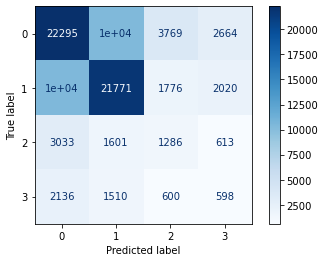

In [1779]:
cm = confusion_matrix(y_test, y_pred)

#plot confusion matrix
plot_confusion_matrix(DT, X_test_fselect, y_test, cmap=plt.cm.Blues);

In [1780]:
from sklearn.metrics import precision_score, recall_score, classification_report

Lets also take a look at a few other scoring methods to holistically understand the performaance of our dataet.

In [1781]:
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.5427943463800425
Recall: 0.532253767476341


In [1782]:
#print the classification report 
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.59      0.57      0.58     39004
           1       0.62      0.61      0.61     35950
           2       0.17      0.20      0.18      6533
           3       0.10      0.12      0.11      4844

    accuracy                           0.53     86331
   macro avg       0.37      0.37      0.37     86331
weighted avg       0.54      0.53      0.54     86331



The accuracy of this model is less than 50% which is even worse than the probability of flipping a coin. 

We can see that although the CV scores are high, the accuracy is low, showing that the model overfitted to the training set, speciifically to Category 1, since the recall and was relatively a lot higher for this category.

The model performed poorly for the other 3 categories. This is showing signs that there might be a need to increase the granulatiry of our modelling variables. Nonetheless, we will continue to explore other models for catgorical data and evaluate further.

In [1783]:
# result in model data structure

models['Model Name'].append('Decision Tree Classifier')
models['Accuracy'].append(accuracy)
models['CV Score'].append(np.mean(cv_scores))
models['Precision'].append(precision)
models['Recall'].append(recall)

### KNN Model

While Decision Trees can be a powerful and flexible algorithm for classification tasks, they can suffer from overfitting and can be sensitive to the choice of hyperparameters. K-Nearest Neighbors (KNN), on the other hand, is a non-parametric algorithm that makes no assumptions about the underlying distribution of the data and can be less prone to overfitting. 

KNN can also be more effective than Decision Trees for datasets with well-separated clusters like ours, as it relies on the distance between data points to make predictions rather than fitting a model to the data. By exploring KNN as an alternative to Decision Trees, we may be able to find a more robust and accurate model for our specific dataset.

We can use hyperparameter tuning to optimize the performance.

We will optimize for 4 parameters:

    1. n_neighbours: This is the number of neighbours the model uses to make the prediction. BEcause of the large set of out data, it would be helpful to start with a range that can cover small and large number of neighbours. Therefore we caan use 5, 10, 25, 50, 100, 1000].
    
    2. weights: We will investigate the uniform and distance metrics.
    
    3. metric: We will use Euclidean, Manhattan and Minkowski distance as parameters
    
    4. algorithm: We will set this to auto and let knn choose the best algorithm to use according to the dataset.  This will also help us computationally.
    
    


In [1786]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [1787]:
# Define the KNN classifier and the parameter grid for grid search
knn = KNeighborsClassifier()

# Define parameter grid distribution
param_grid = {'n_neighbors': [100, 500, 1000],
              'weights': ['uniform', 'distance'],'metric': ['euclidean', 'manhattan'],
              'algorithm': ['auto', 'ball_tree']}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=3, scoring='accuracy')

#grid_search.fit(X_train_knn_dr, y_train_resampled2)
grid_search.fit(X_train_fselect, y_train_resampled)

# Print best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

KeyboardInterrupt: 

In [ ]:
# Make predictions on test set with best parameters
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_fselect)

In [ ]:
# Evaluate the model with cross-validation

cv_scores = cross_val_score(best_knn, X_train_fselect, y_train_resampled, cv=3, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

In [ ]:
# # Make predictions on test set with best parameters
# best_knn = grid_search.best_estimator_
# y_pred = best_knn.predict(X_test_fselect)

In [ ]:
# Calculate the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
# print("Confusion matrix:\n", conf_mat)
print("Classification report:\n", class_report)

In [ ]:
# plot_confusion_matrix(cm=cm,classes=label_encoding.keys())
plot_confusion_matrix(best_knn, X_test_fselect, y_test, cmap=plt.cm.Blues);

In [ ]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')

print("Precision:", precision)
print("Recall:", recall)

Talk about the results and what does it show

In [ ]:
# result in model data structure

models['Model Name'].append('KNN MODEL')
models['Accuracy'].append(accuracy)
models['CV Score'].append(np.mean(cv_scores))
models['Precision'].append(precision)
models['Recall'].append(recall)

### Random Forests Model

We are going to try a Random Forest Modele now t osee if we cana get better results. Random forests aare generally better equipped to handle imbalanced datasets wiithout the need to undersample or creaate synthetic datapoints. Random forests model are also better ata handling larger datasets which can help with the amount of data that we have.

We can set te class_weight parameter to balanced for the random forest to deal with the imabalanced dataset withouot loosing any original data to random sampling.

We can also tune several different hyperparameters and use randomized search to see which ones would be the best to use.

    1. n_estimators: Since we have such a large dataset, we will teest between 100-2000 to see what would be our optimizied option
    
    2. max_depth: We will test out different options to see how many branches the trees should make
    
    3. min_samples_split: We will check what is the minimum amount of splits that thee model needs to perform
    
    4. min_samples leaf: Whta is the minimum number of leafs that it needs to create for optimized performance

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Define Random Forest classifier with random state
RFC = RandomForestClassifier(random_state=54)

# Define parameter distribution
param_dist = {'n_estimators': [100, 500, 1000],
#               'max_samples_split': [2, 5, 10], 'max_samples_leaf': [1, 2, 4],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10],class_weight="balanced",
              'min_samples_leaf': [1, 2, 4]}

# Perform random search with cross validation
random_search = RandomizedSearchCV(RFC, param_distributions=param_dist, cv=3, n_iter=50, random_state=42)
random_search.fit(X_train_scaled_fselect, y_train)

# Print best parameters and best score
print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

In [ ]:
# Make predictions on test set with best parameters
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled_fselect)

In [ ]:
# Evaluate the model with cross-validation
cv_scores = cross_val_score(best_rf, X_train_fselect, y_train_resampled, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

In [ ]:
# Calculate the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
# print("Confusion matrix:\n", conf_mat)
print("Classification report:\n", class_report)

In [ ]:
# plot_confusion_matrix(cm=cm,classes=label_encoding.keys())
plot_confusion_matrix(best_rf, X_test_scaaled_fselect, y_test, cmap=plt.cm.Blues);

In [ ]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')

print("Precision:", precision)
print("Recall:", recall)

Talk about model performance

In [ ]:
# result in model data structure

models['Model Name'].append('Random Forest Classifier')
models['Accuracy'].append(accuracy)
models['CV Score'].append(np.mean(cv_scores))
models['Precision'].append(precision)
models['Recall'].append(recall)

### XG Boost Model

We would want to try another model to see if we can improve performance. We will try XGBoost nex which is one of the most popular ensemble method. XGBoost (Extreme Gradient Boosting) and Random Forest are both ensemble learning algorithms used in machine learning for classification and regression tasks. There are a few pros of using XGBoost as compared to Random Forests. 

    1. Handling of non-linear data: XGBoost can handle non-linear relationships between the features and the target variable better than Random Forest. This is because XGBoost uses a gradient boosting approach that builds a sequence of weak models to improve the overall prediction accuracy. Each model tries to capture the remaining error of the previous models, allowing the model to learn complex non-linear patterns in the data.

    2. Regularization: XGBoost uses regularization techniques such as L1, L2 regularization and dropout to prevent overfitting and improve the model's generalization ability. Random Forest, on the other hand, relies on bootstrapping and feature bagging to reduce overfitting.

    3. Speed: XGBoost is often faster than Random Forest due to its implementation using parallel processing techniques and the use of efficient data structures such as Compressed Sparse Column (CSC) matrix.

    4. Handling missing values: XGBoost can handle missing values in the data, whereas Random Forest cannot. XGBoost can learn how to use information from other variables to fill in missing data points, which can help improve the model's accuracy.

We will also use gridsearch for hyperparameter tuning for 3 parameters. 

    1.n_estimators: Since oour dataset is significantly larger, we will use three different iterations, 500,1000,2500.
    
    2. learning rate: The learning rate, also known as the step size, controls the magnitude of the updates made to the model parameters at each step during the training process. The learning rate determines the extent to which the algorithm should rely on new information compared to the previous information while updating the model parameters.
    
    3. max_depth: We will try out 6, 9 and 11

In [ ]:
from xgboost import XGBClassifier

# Defing XG Boosting Classifier along with random state
XG = XGBClassifier(random_state=54 , reg_alpha=0.1)

# Define parameter grid
param_grid = {'n_estimators': [100, 500, 1000],
              'learning_rate': [0.3, 0.5, 1],
              'max_depth': [6, 9, 15]}

# Perform grid search
grid_search = GridSearchCV(XG, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_fselect, y_train_resampled)

# Print best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

In [ ]:
# Evaluate the model with cross-validation
cv_scores = cross_val_score(best_xgb, X_train_fselect, y_train_resampled, cv=3)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

In [ ]:
# Make predictions on test set with best parameters
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test_fselect)

In [ ]:
# Calculate the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
# print("Confusion matrix:\n", conf_mat)
print("Classification report:\n", class_report)

In [ ]:
# plot_confusion_matrix(cm=cm,classes=label_encoding.keys())
plot_confusion_matrix(best_xgb, X_test_fselect, y_test, cmap=plt.cm.Blues);

In [ ]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')

print("Precision:", precision)
print("Recall:", recall)

Talk about model performance

In [ ]:
# result in model data structure

models['Model Name'].append('XG Booster Classifier')
models['Accuracy'].append(accuracy)
models['CV Score'].append(np.mean(cv_scores))
models['Precision'].append(precision)
models['Recall'].append(recall)

### Models Comparison

In [ ]:
# Creating Dataframe of Model Evaluation
models = pd.DataFrame(models)

# top model based on Accurary
models.sort_values(by='Accuracy', ascending= False)

In [ ]:
# top model based on CV Score
models.sort_values(by='CV Score', ascending= False)

In [ ]:
# top model based on Recall Score
models.sort_values(by='Recall', ascending= False)

## Final Model Evlauation

We have looked at aa few different performaance metric but as wee taalked about eearalier, our main focus will be accuracy so thaata we know how accurate are predictions are.

In [ ]:
models.sort_values(by='Accuracy', ascending= False).head(1)

Talk about the final model and why it is a good option

Lets predict the unable to determine dataset

In [ ]:
unable_to_determine_preds = best_xgb.predict(Xu_fselect)

In [ ]:
unable_to_determine_preds.value_counts()

Talk about these results

Also, looking at the features that showcased to play the largest imapct were the ones listed below.

In [ ]:
features_used

These features show that the following areas would be valuable areas for the DOT to work on towards Vision Zero

Mention insights about the Top 10 features

## Recommendations

Talk about whether the model is performing well or not

### Improvements

    1. The model can be improved with higher granular datasets but will require higher computng resources
    2. Random Sampling can be performed using centroidal methods
    3. Use pipelines for faster performance
    4. A few parameter searches reached maximum, try it more iterations with higher values
    5. Rather than random search, try Grid Search

### Next Steps

Talk about either futher granular analysis and deriving insights for actionable steps